<a href="https://colab.research.google.com/github/chungsoonyeow-hub/ADALL_github/blob/main/0_1_LLM_Proj-08022026.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Setup: import libraries


In [ ]:
# Core libraries
import pandas as pd
import numpy as np
# Visualisation
import matplotlib.pyplot as plt
# Modelling and preprocessing
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb

**2. Load the dataset**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
## as my dataset is too huge, i can only upload to google drive instead of github
try:
    df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/incident_event_log.csv")
    print("Successfully loaded data from Colab!")
    #display(df.head())
    # Preview dataset
    data_preview = df.head(10).to_string()
    print(data_preview)
except Exception as e:
    print(f"Error loading data: {e}")
    print("Please ensure the URL is correct and the file format is compatible with `pd.read_csv`.")

Successfully loaded data from Colab!
       number incident_state  active  reassignment_count  reopen_count  sys_mod_count  made_sla    caller_id       opened_by        opened_at  sys_created_by   sys_created_at  sys_updated_by   sys_updated_at contact_type      location     category      subcategory    u_symptom cmdb_ci      impact     urgency      priority assignment_group  assigned_to  knowledge  u_priority_confirmation         notify problem_id rfc vendor caused_by closed_code      resolved_by      resolved_at       closed_at
0  INC0000045            New    True                   0             0              0      True  Caller 2403    Opened by  8  29/2/2016 01:16    Created by 6  29/2/2016 01:23   Updated by 21  29/2/2016 01:23        Phone  Location 143  Category 55  Subcategory 170   Symptom 72       ?  2 - Medium  2 - Medium  3 - Moderate         Group 56            ?       True                    False  Do Not Notify          ?   ?      ?         ?      code 5  Resolved by 14

In [ ]:
### connect to API
from google.colab import userdata
from openai import OpenAI

# Load key from Google Colab Secrets
api_key = userdata.get('OPENAI_API_KEY')

client = OpenAI(
    api_key=api_key,
)

In [ ]:
#sending to LLM API for business problem description
response = client.responses.create(
    model="gpt-5-mini",
    instructions="""
    You are an expert data scientist with extensive knowledge of models working on a new project
""",
    input=f"""
    [CONTEXT]
    This project is related to IT incident management. The company is facing issues with SLA breaches and the IT Service Manager is trying to reduce the incident SLA breach rate.

    [TASK]
    Generate a business problem paragraph that describes:
    1. What the problem is
    2. Why it matters to the organisation
    3. Who is affected and what pain poin ts they face

    [FORMAT]

    Respond in paragraph form, using clear line breaks. Insert a blank line between key ideas to improve readability.Limit to max 100 words.

    [CONSTRAINTS]
    Do not include technical terms like modelling, prediction, or machine learning. Avoid overly generic phrases like “AI can help.” Focus on the business situation and impact.
    """)
print(response.output_text)

The organization is experiencing frequent IT incident SLA breaches, with incidents remaining unresolved beyond agreed response and resolution times, causing recurring service interruptions.

This matters because breaches erode customer trust, increase operational costs, risk contractual penalties, and slow business operations, hindering revenue and strategic initiatives.

Service desk and IT teams face constant firefighting and overload, business users suffer lost productivity and missed deadlines, and executives contend with reputational damage and escalations that strain resources.


In [ ]:
#sending to LLM API for business problem description
response = client.responses.create(
    model="gpt-5-mini",
    instructions="""
   You are a expert data scientist with extensive knowledge of tree base models working on a new project
""",
    input=f"""


    [CONTEXT]
    This project is about improving how IT incidents are managed. The company is concerned about SLA breaches and hopes to reduce them. There are various users affected by this issue. It is important that we understand their needs.

    [TASK]
    Generate a business problem paragraph that describes:
    1. What the problem is
    2. Why it matters to the organisation
    3. Who is affected and what pain points they face

    Stakeholder Persona:
    1. Who is the main user?
    2. What do they need? their pain points and goals
    3. How they would use the solution?

    Modelling Objective:
    1. What are we predicting?
    2. What metrics matter?

    [FORMAT]
    Use a formal and professional tone.
    Respond in paragraph form, using clear line breaks. Insert a blank line between key ideas to improve readability.

    [CONSTRAINTS]
    Keep response concise and actionable.
    """)
print(response.output_text)

The organisation is experiencing a high and growing rate of IT incident SLA breaches, driven by slow triage, inconsistent prioritisation and reactive escalation processes. This undermines service availability, increases operational costs and creates regulatory and contractual exposure through penalties and lost revenue, while eroding customer and employee trust.

This matters because SLA breaches directly impact business continuity and productivity, inflate support costs through repeated work and escalations, and degrade customer satisfaction and retention. Reducing breaches improves operational efficiency, lowers costs, and preserves contractual and reputational value.

Affected parties include IT operations and service desk teams (who face firefighting, unclear priorities and inefficient resource allocation), business users and customers (who suffer downtime and disrupted workflows), and executives (who must manage financial and reputational risk). Pain points are incomplete incident

In [ ]:



#sending to LLM API for business problem description
response = client.responses.create(
    model="gpt-5-mini",
    instructions="""
   You are a expert data scientist with extensive knowledge of tree base models working on a new project
""",
    input=f"""
     [CONTEXT]
    This project is about improving how IT incidents are managed. The company is concerned about SLA breaches and hopes to reduce them.
    [TASK]
    Write a short paragraph that explains:
    - What is the business problem
    - Why it matters
    - Who is affected

    Also describe the main stakeholder persona and what they care about.
    Add a short section about what to predict and how to measure success.

    [FORMAT]
    Use clear language in paragraph form.
    Respond in paragraph form, using clear line breaks. Insert a blank line between key ideas to improve readability.

     [CONSTRAINTS]
    Keep response concise and actionable.

 """)
print(response.output_text)

In [ ]:
#sending to LLM API for business problem description
response = client.responses.create(
    model="gpt-5-mini",
    instructions="""
   You are a expert data scientist with extensive knowledge of tree base models working on a new project
""",
    input=f"""
    [CONTEXT]
    This project focuses on improving how IT incidents are managed in the organisation. The company is concerned about SLA breaches, which are affecting service quality and compliance. Johnny Lim, the IT Service Manager, wants to reduce SLA breaches — his key performance indicator (KPI).

    One recurring issue is that incident tickets are sometimes assigned to the wrong teams. These teams hold onto the tickets without action, leading to delays and potential SLA breaches. Johnny hopes to build a model that can help flag incidents likely to breach SLA right after creation, based on past data such as urgency, severity, assignment group, and time open. If high-risk tickets are detected early, the ITSM team can manually review and redirect them to the correct team faster.

    [TASK]
    Generate a business problem paragraph that describes:
    -What the problem is
    -Why it matters to the organisation
    -Who is affected and what pain points they face

    Stakeholder Persona
    -Who is the main user?
    -What do they need — their pain points and goals?
    -How would they use the solution?

    Modelling Objective
    -What are we predicting?
    -What metrics matter?
    -What features are likely important for prediction?

    [FORMAT]
    Use a formal and professional tone.
    Respond in paragraph form with line breaks between sections for readability.

    [CONSTRAINTS]
    Keep the response concise and actionable.
 """)
print(response.output_text)

Business problem: Incident tickets are frequently routed to incorrect assignment groups and then left unattended, causing increased time-to-resolution and a rise in SLA breaches. This undermines service quality, exposes the organisation to compliance risk and potential financial penalties, and damages stakeholder confidence. The operational consequences include growing backlogs, repeated manual reassignments, overtime costs, and missed KPIs that affect both IT performance reporting and business continuity.

Stakeholder persona: The primary user is Johnny Lim, the IT Service Manager, who needs rapid, reliable identification of tickets at high risk of breaching SLA so he can intervene early. His pain points are limited visibility into misrouted tickets at creation, reactive firefighting, and pressure to meet SLA targets with constrained resources. He would use the solution as a near-real-time triage aid — receiving risk flags and ranked queues for manual review or suggested reassignment,

In [ ]:
## use this
  You are a expert data scientist with extensive knowledge of tree base models working on a new project

[CONTEXT]
This project is about improving how IT incidents are managed. The company is concerned about SLA breaches and hopes to reduce them. Johnny Lim,
 IT Service Manager, wants to reduce SLA breaches as this is his most important KPI, his concern is some teams are holding to incident tickets
 which are wrongly assigned to them potentially causing SLA breach. Based on historical transaction, identify what factors will affect
  the SLA of the incident, such as urgency, severity etc and predict if an incident will likely to breach SLA upon creation so that the
   ITSM team will be looped in to assign the case manually to the rightful team to work on it.

[TASK]
Generate a business problem paragraph that describes:
1. What the problem is
2. Why it matters to the organisation
3. Who is affected and what pain points they face

Stakeholder Persona: Johnny Lim, IT Service Manager, wants to reduce SLA breaches as some teams are holding to incident tickets which are wrongly assigned to them potentially causing SLA breach.
1. Who is the main user?
2. What do they need? their pain points and goals
3. How they would use the solution

Modelling Objective: Based on historical transactions, identify
1. What are we predicting?
2. What metrics matter?

[FORMAT]
Use a formal and professional tone.
Respond in paragraph form, using clear line breaks. Insert a blank line between key ideas to improve readability.

[CONSTRAINTS]
Keep response concise and actionable.



**3. Quick Profile on the 140k transaction log**

In [ ]:
print("=== INCIDENT LOG QUICK PROFILE ===")
print(f"Shape: {df.shape}")
print("\nALL COLUMNS:")
print(df.columns.tolist())
print("\nTarget `made_sla`:")
print(df['made_sla'].value_counts())
print("\nUnique Incidents:")
print(df['number'].nunique())
print("\nRows per Incident (avg):")
print(df.groupby('number').size().mean())
print("\nHead:")
print(df.head())

=== INCIDENT LOG QUICK PROFILE ===
Shape: (141712, 36)

ALL COLUMNS:
['number', 'incident_state', 'active', 'reassignment_count', 'reopen_count', 'sys_mod_count', 'made_sla', 'caller_id', 'opened_by', 'opened_at', 'sys_created_by', 'sys_created_at', 'sys_updated_by', 'sys_updated_at', 'contact_type', 'location', 'category', 'subcategory', 'u_symptom', 'cmdb_ci', 'impact', 'urgency', 'priority', 'assignment_group', 'assigned_to', 'knowledge', 'u_priority_confirmation', 'notify', 'problem_id', 'rfc', 'vendor', 'caused_by', 'closed_code', 'resolved_by', 'resolved_at', 'closed_at']

Target `made_sla`:
made_sla
True     132497
False      9215
Name: count, dtype: int64

Unique Incidents:
24918

Rows per Incident (avg):
5.687133798860262

Head:
       number incident_state  active  reassignment_count  reopen_count  \
0  INC0000045            New    True                   0             0   
1  INC0000045       Resolved    True                   0             0   
2  INC0000045       Resolved  

In [ ]:
# Brief Findings
#Dataset is transactional (141k events → 24k incidents, avg 5.7 rows/incident)—use last record for final SLA state.
#Severe imbalance (93.5% made_sla=True) demands F1-macro + balanced weights (industry standard for rare breaches).

**4. Aggregate into unqiue incident records taking the latest transaction record for SLA status**

In [ ]:
# RECREATE from raw (140k → 24k agg)


#Aggregation (latest per incident)
df_agg = df.sort_values(['number', 'sys_updated_at']).groupby('number').last().reset_index()
print(f"AGGREGATED: {df_agg.shape}")  # Expect ~24k x 36

# Drive save
from google.colab import drive
drive.mount('/content/drive')
target = '/content/drive/MyDrive/Colab Notebooks/incident_aggregate.csv'
df_agg.to_csv(target, index=False)
print(f"SAVED: {target}")

# Quick check
print("Breach rate:", (df_agg['made_sla'] == False).mean())
print("Leak check:", 'resolved_at' in df_agg.columns)  # Keep for now → drop later


AGGREGATED: (24918, 36)
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
SAVED: /content/drive/MyDrive/Colab Notebooks/incident_aggregate.csv
Breach rate: 0.16301468817722128
Leak check: True


In [ ]:
#### new payload text from aggregated 24k

import pandas as pd
import numpy as np
from io import StringIO

# ---------------------------
# Generate a full dataset profile
# ---------------------------

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/incident_aggregate.csv')
print("Loaded shape:", df.shape)

buffer = StringIO()

# dtypes
buffer.write("=== DTYPES ===\n")
buffer.write(df.dtypes.to_string())
buffer.write("\n\n")

buffer.write("=== TARGET FOCUS ===\n")
buffer.write(df['made_sla'].value_counts(normalize=True).round(3).to_string())
buffer.write("Imbalance → F1_macro + class_weight='balanced'\n\n")

# numeric describe
buffer.write("=== NUMERIC DESCRIBE ===\n")
buffer.write(df.describe().to_string())
buffer.write("\n\n")

# categorical describe
buffer.write("=== CATEGORICAL DESCRIBE ===\n")
try:
    buffer.write(df.describe(include='object').to_string())
except:
    buffer.write("No categorical columns")
buffer.write("\n\n")

# null summary
buffer.write("=== NULL SUMMARY ===\n")
null_summary = (
    df.isna().sum().to_frame("null_count")
    .assign(null_pct=lambda x: x["null_count"]/len(df))
)
buffer.write(null_summary.to_string())
buffer.write("\n\n")

# unique cardinality
buffer.write("=== UNIQUE VALUES PER COLUMN ===\n")
buffer.write(df.nunique().to_frame("unique_count").to_string())
buffer.write("\n\n")

# correlation matrix
buffer.write("=== CORRELATIONS (NUMERIC ONLY) ===\n")
buffer.write(df.corr(numeric_only=True).round(3).to_string())
buffer.write("\n\n")

# value counts for categoricals
buffer.write("=== VALUE COUNTS (TOP 20 PER CATEGORICAL COLUMN) ===\n")
cat_cols = df.select_dtypes(include='object').columns
if len(cat_cols) > 0:
    for col in cat_cols:
        buffer.write(f"\nColumn: {col}\n")
        vc = df[col].value_counts().head(20)
        buffer.write(vc.to_string())
        buffer.write("\n")
else:
    buffer.write("No categorical columns\n")
buffer.write("\n")

# --------- FIXED OUTLIER COMPUTATION (NO BOOLEANS) ---------
buffer.write("=== OUTLIER SUMMARY (IQR METHOD) ===\n")
num_cols = df.select_dtypes(include=['number']).columns  # exclude booleans
Q1 = df[num_cols].quantile(0.25)
Q3 = df[num_cols].quantile(0.75)
IQR = Q3 - Q1
outliers = ((df[num_cols] < (Q1 - 1.5*IQR)) | (df[num_cols] > (Q3 + 1.5*IQR))).sum()
buffer.write(outliers.to_string())
buffer.write("\n\n")

# leakage scan: columns with all unique values
buffer.write("=== POSSIBLE LEAKAGE COLUMNS (UNIQUE FOR EACH ROW) ===\n")
leak_cols = df.columns[df.nunique() == len(df)]
buffer.write(str(list(leak_cols)))
buffer.write("\n\n")

# shape, duplicates, constant cols
buffer.write("=== SHAPE / DUPLICATES / CONSTANT COLUMNS ===\n")
dup_count = df.duplicated().sum()
constant_cols = df.columns[df.nunique() == 1].tolist()
buffer.write(f"Rows: {len(df)}, Columns: {df.shape[1]}\n")
buffer.write(f"Duplicate rows: {dup_count}\n")
buffer.write(f"Constant columns: {constant_cols}\n\n")

#####csy

buffer.write("===* NEAR-CONSTANT COLUMNS (>=95% SAME VALUE) ===\n")
near_constant_cols = []
for col in df.columns:
    top_freq = df[col].value_counts(normalize=True).iloc[0]
    if top_freq >= 0.95:
        near_constant_cols.append(col)

buffer.write(str(near_constant_cols) if near_constant_cols else "None")
buffer.write("\n\n")

buffer.write("===* BINARY / BOOLEAN-LIKE COLUMNS ===\n")
binary_cols = [c for c in df.columns if df[c].nunique() == 2]
for col in binary_cols:
    buffer.write(f"\nColumn: {col}\n")
    buffer.write(df[col].value_counts(normalize=True).to_string())
    buffer.write("\n")
buffer.write("\n")

buffer.write("=== *NUMERIC SKEWNESS SUMMARY ===\n")
skewness = df[num_cols].skew().round(2)
buffer.write(skewness.to_string())
buffer.write("\n\n")
#skewnss is not an issue for tree models

####csy
buffer.write("\n=== TASK ===\nPredict made_sla=False (breach) at ticket creation.\n")

# Final text
payload_text = buffer.getvalue()

print(payload_text)

Loaded shape: (24918, 36)
=== DTYPES ===
number                     object
incident_state             object
active                       bool
reassignment_count          int64
reopen_count                int64
sys_mod_count               int64
made_sla                     bool
caller_id                  object
opened_by                  object
opened_at                  object
sys_created_by             object
sys_created_at             object
sys_updated_by             object
sys_updated_at             object
contact_type               object
location                   object
category                   object
subcategory                object
u_symptom                  object
cmdb_ci                    object
impact                     object
urgency                    object
priority                   object
assignment_group           object
assigned_to                object
knowledge                    bool
u_priority_confirmation      bool
notify                     object
problem

In [ ]:
##  NEW  open ai prompt   data profiling on data issues and cleaning
##  open ai prompt   data profiling on data issues and cleaning

response = client.responses.create(
    model="gpt-5-mini",
    instructions="""
You are an expert data scientist with extensive knowledge of tree-based models.
Always justify recommendations using reasoning trace based ONLY on the dataset profile.
""",
    input=f"""
    Context (given):\n
- Business Objective: Predict SLA breach for incident tickets based on structured metadata.
- Target: The field `made_sla` indicates whether the SLA was met.
    - If `made_sla` is False → SLA was breached.
    - If `made_sla` is True → SLA was met.
Dataset info: {payload_text}\n
Questions:\n
1. Based on the dataset profile, what data quality issues should be resolved before modelling?
Provide a priority list and justify each item. \n
2. Which columns appear redundant, correlated, or likely to cause leakage?
Explain why each is problematic. \n
Next: Provide a python script to handle the identified issues.
Define one helper function for each issue.
Then define a wrapper function that calls these helper with true false option as user choice
Provide a single line of code to run the overall wrapper function.
Do not encode categorical columns or model first.
""")

print(response.output_text)

Below I first answer Q1–Q2 with prioritized, dataset-specific reasoning (traceable to the profile you provided). After that I give a Python cleaning script with one helper function per issue and a wrapper that calls them. The wrapper is configurable (True/False options). I do not encode categoricals or build a model here.

-------------------------
1) Priority list of data‑quality issues and recommended fixes (with justification from the profile)

Priority A — must fix before modelling (high risk of leakage / wrong signals)
- Systematic placeholder "?" that represents missing values: many object columns show "?" as top value or very high frequency (e.g., sys_created_by top value is "?" with freq 11495; cmdb_ci has "?" for 24864 of 24918). If not converted to true missing (NaN) models/encoders will treat "?" as a real category and produce misleading splits. Action: convert "?" to NaN across object columns.
- Leakage columns that reveal post‑creation outcome or lifecycle state: resolved_

In [ ]:


### CLEANING CODES - FINAL VERSION (DROP & UPDATE ONLY)

import pandas as pd
import numpy as np
from google.colab import drive
# drive.mount('/content/drive')

print("=== LOAD 24K AGGREGATED ===")
df_clean = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/incident_aggregate.csv')
print("Loaded shape:", df_clean.shape)

print("\n=== BEFORE CLEANING ===")
print("Shape:", df_clean.shape)
print("\nTarget balance:\n", df_clean['made_sla'].value_counts(normalize=True).round(3))

# -------------------------------------------------
# 1. Replace placeholder '?' → NaN (ALL columns)
# -------------------------------------------------
df_clean = df_clean.replace('?', np.nan)

# -------------------------------------------------
# 2. Drop leakage: post-resolution / post-creation fields
# -------------------------------------------------
leak_cols = [
    'resolved_at', 'closed_at', 'resolved_by', 'closed_code',
    'sys_updated_at', 'sys_updated_by'
]
df_clean = df_clean.drop(columns=[c for c in leak_cols if c in df_clean.columns])

# -------------------------------------------------
# 3. Drop identifier-like / ID fields
# -------------------------------------------------
id_cols = [
    'number', 'caller_id', 'opened_by', 'assigned_to',
    'sys_created_by', 'sys_created_at'
]
df_clean = df_clean.drop(columns=[c for c in id_cols if c in df_clean.columns])

# -------------------------------------------------
# 3b. Drop lifecycle status fields (state indicators)
# -------------------------------------------------
state_cols = ['incident_state', 'active']
df_clean = df_clean.drop(columns=[c for c in state_cols if c in df_clean.columns])

# -------------------------------------------------
# 4. Drop lifecycle counters / future leakage
# -------------------------------------------------
lifecycle_cols = [
    'reassignment_count', 'reopen_count', 'sys_mod_count'
]
df_clean = df_clean.drop(columns=[c for c in lifecycle_cols if c in df_clean.columns])

# -------------------------------------------------
# 5. Drop known non-predictive / near-constant fields
# -------------------------------------------------
low_value_cols = [
    'notify', 'knowledge', 'u_priority_confirmation'
]
df_clean = df_clean.drop(columns=[c for c in low_value_cols if c in df_clean.columns])

# -------------------------------------------------
# 6. Drop post-investigation linkage fields
# -------------------------------------------------
post_investigation_cols = [
    'problem_id', 'rfc', 'vendor', 'caused_by'
]
df_clean = df_clean.drop(columns=[c for c in post_investigation_cols if c in df_clean.columns])

# -------------------------------------------------
# 7. Datetime safety (KEEP opened_at only)
# -------------------------------------------------
df_clean['opened_at'] = pd.to_datetime(df_clean['opened_at'], errors='coerce')

# -------------------------------------------------
# 8. Drop HIGH-NULL fields (>70%) – EXCLUDING protected fields
# -------------------------------------------------
protected_cols = [
    'opened_at', 'category', 'subcategory', 'assignment_group',
    'location', 'impact', 'urgency', 'priority',
    'contact_type', 'cmdb_ci', 'u_symptom', 'made_sla'
]

null_pct = df_clean.isnull().sum() / len(df_clean) * 100
high_null = null_pct[(null_pct > 70) & (~null_pct.index.isin(protected_cols))]

print("\n=== HIGH NULL (>70%) DROPPED ===")
if len(high_null) > 0:
    print(high_null.sort_values(ascending=False))
    df_clean = df_clean.drop(columns=high_null.index.tolist())
else:
    print("No high-null columns dropped.")

# -------------------------------------------------
# FINAL CHECKS
# -------------------------------------------------
print("\n=== AFTER CLEANING ===")
print("Final shape:", df_clean.shape)

print("\nRemaining nulls (top 10):")
print(df_clean.isnull().sum().sort_values(ascending=False).head(10))

print("\nTarget balance (unchanged):")
print(df_clean['made_sla'].value_counts(normalize=True).round(3))

print("\n=== DESCRIBE FOR SLIDES (SCREENSHOT THIS) ===")
print(df_clean.describe(include='all'))

# -------------------------------------------------
# SAVE CLEAN DATASET
# -------------------------------------------------
df_clean.to_csv('/content/drive/MyDrive/Colab Notebooks/incident_clean_24k1.csv', index=False)
print("\nSaved incident_clean_24k1.csv")

=== LOAD 24K AGGREGATED ===
Loaded shape: (24918, 36)

=== BEFORE CLEANING ===
Shape: (24918, 36)

Target balance:
 made_sla
True     0.837
False    0.163
Name: proportion, dtype: float64


/tmp/ipython-input-405587549.py:72: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df_clean['opened_at'] = pd.to_datetime(df_clean['opened_at'], errors='coerce')



=== HIGH NULL (>70%) DROPPED ===
No high-null columns dropped.

=== AFTER CLEANING ===
Final shape: (24918, 12)

Remaining nulls (top 10):
cmdb_ci             24864
u_symptom            5832
assignment_group     2205
subcategory            21
location               19
category               10
made_sla                0
opened_at               0
contact_type            0
impact                  0
dtype: int64

Target balance (unchanged):
made_sla
True     0.837
False    0.163
Name: proportion, dtype: float64

=== DESCRIBE FOR SLIDES (SCREENSHOT THIS) ===
       made_sla                      opened_at contact_type      location  \
count     24918                          24918        24918         24899   
unique        2                            NaN            5           224   
top        True                            NaN        Phone  Location 204   
freq      20856                            NaN        24687          5553   
mean        NaN  2016-04-15 16:17:42.879845888        

In [ ]:
### Transformation and grouping
## ============================================
### STAGE 2: FEATURE ENGINEERING (CREATION TIME)
### ============================================

df_fe = df_clean.copy()

print("\n=== STAGE 2: FEATURE ENGINEERING ===")
print("Starting shape:", df_fe.shape)

# -------------------------------------------------
# 1. TIME FEATURES from opened_at
# -------------------------------------------------
# Assumes opened_at already cast to datetime
df_fe['opened_hour'] = df_fe['opened_at'].dt.hour
df_fe['opened_dayofweek'] = df_fe['opened_at'].dt.dayofweek  # 0=Mon
df_fe['is_weekend'] = df_fe['opened_dayofweek'].isin([5, 6]).astype(int)

# Optional: business hours flag (8am–6pm)
df_fe['is_business_hours'] = df_fe['opened_hour'].between(8, 18).astype(int)

# -------------------------------------------------
# 2. GROUP HIGH-CARDINALITY CATEGORICALS
# -------------------------------------------------

def group_top_n(series, top_n):
    top_vals = series.value_counts().nlargest(top_n).index
    return series.where(series.isin(top_vals), other='OTHER')

# Location → Top 10
df_fe['location_grp'] = group_top_n(df_fe['location'], top_n=10)

# Subcategory → Top 30
df_fe['subcategory_grp'] = group_top_n(df_fe['subcategory'], top_n=30)

# Assignment Group → Top 20
df_fe['assignment_group_grp'] = group_top_n(df_fe['assignment_group'], top_n=20)

# -------------------------------------------------
# 3. CMDB / ASSET FEATURE
# -------------------------------------------------
# CMDB mostly missing → convert to presence flag
df_fe['has_cmdb_ci'] = df_fe['cmdb_ci'].notna().astype(int)

# (Optional – only if you want asset grouping later)
# df_fe['cmdb_grp'] = group_top_n(df_fe['cmdb_ci'], top_n=10)

# -------------------------------------------------
# 4. TEXT FEATURE FROM u_symptom (SAFE & SIMPLE)
# -------------------------------------------------

# Presence of text itself can be a signal
df_fe['has_symptom_text'] = df_fe['u_symptom'].notna().astype(int)

# Length-based complexity proxy
df_fe['symptom_length'] = df_fe['u_symptom'].fillna('').str.len()

# Optional binning for interpretability
# df_fe['symptom_len_bin'] = pd.cut(
#     df_fe['symptom_length'],
#     bins=[-1, 0, 50, 150, df_fe['symptom_length'].max()],
#     labels=['none', 'short', 'medium', 'long']
# )

df_fe['symptom_len_bin'] = pd.cut(
    df_fe['symptom_length'],
    bins=[-1, 0, 50, 150, 10000],
    labels=['none', 'short', 'medium', 'long']
)

# -------------------------------------------------
# 5. CLEAN UP RAW COLUMNS (KEEP ENGINEERED ONES)
# -------------------------------------------------
drop_raw_cols = [
    'opened_at',
    'location',
    'subcategory',
    'assignment_group',
    'cmdb_ci',
    'u_symptom'
]

df_fe = df_fe.drop(columns=[c for c in drop_raw_cols if c in df_fe.columns])

# -------------------------------------------------
# FINAL CHECK
# -------------------------------------------------
print("\n=== AFTER FEATURE ENGINEERING ===")
print("Final shape:", df_fe.shape)

print("\nRemaining columns:")
print(df_fe.columns.tolist())

print("\nMissing values (top 10):")
print(df_fe.isnull().sum().sort_values(ascending=False).head(10))

# SAVE STAGE 2 DATASET
df_fe.to_csv('/content/drive/MyDrive/Colab Notebooks/incident_fe_24k2.csv', index=False)
print("\nSaved incident_fe_24k2.csv")


=== STAGE 2: FEATURE ENGINEERING ===
Starting shape: (24918, 12)

=== AFTER FEATURE ENGINEERING ===
Final shape: (24918, 17)

Remaining columns:
['made_sla', 'contact_type', 'category', 'impact', 'urgency', 'priority', 'opened_hour', 'opened_dayofweek', 'is_weekend', 'is_business_hours', 'location_grp', 'subcategory_grp', 'assignment_group_grp', 'has_cmdb_ci', 'has_symptom_text', 'symptom_length', 'symptom_len_bin']

Missing values (top 10):
category             10
made_sla              0
contact_type          0
impact                0
urgency               0
priority              0
opened_hour           0
opened_dayofweek      0
is_weekend            0
is_business_hours     0
dtype: int64

Saved incident_fe_24k2.csv


In [ ]:
# Final data cleaning
# ============================================
# FINAL DATA VALIDATION BEFORE MODELLING
# ============================================

print("\n=== FINAL DATA CHECKS (BEFORE DROP) ===")

# 1. Shape
print("Shape:", df_fe.shape)

# 2. Columns
print("\nColumns:")
print(df_fe.columns.tolist())

# 3. Target distribution
print("\nTarget distribution:")
print(df_fe['made_sla'].value_counts())
print("\nTarget proportion:")
print(df_fe['made_sla'].value_counts(normalize=True).round(3))

# 4. Missing values (only show those with missing)
print("\nMissing values (>0 only):")
missing = df_fe.isnull().sum()
print(missing[missing > 0])

# 5. Basic sanity checks on engineered features
print("\nOpened hour range:", df_fe['opened_hour'].min(), "to", df_fe['opened_hour'].max())
print("Day of week distribution:")
print(df_fe['opened_dayofweek'].value_counts().sort_index())

print("\nWeekend flag distribution:")
print(df_fe['is_weekend'].value_counts())

print("\nBusiness hours flag distribution:")
print(df_fe['is_business_hours'].value_counts())

# 6. Cardinality check for grouped categoricals
grouped_cols = ['location_grp', 'subcategory_grp', 'assignment_group_grp']
print("\nGrouped categorical cardinality:")
for col in grouped_cols:
    print(f"{col}: {df_fe[col].nunique()} unique values")

# ============================================
# FINAL FEATURE SELECTION (DROP REDUNDANT FIELDS)
# ============================================

print("\n=== DROPPING REDUNDANT FIELDS ===")

cols_to_drop = [
    'symptom_length',
    'symptom_len_bin'
]

df_final = df_fe.drop(columns=[c for c in cols_to_drop if c in df_fe.columns])

print("Final shape after drop:", df_final.shape)
print("Final columns:")
print(df_final.columns.tolist())

# ============================================
# SAVE FINAL MODELLING DATASET
# ============================================

final_path = '/content/drive/MyDrive/Colab Notebooks/incident_fe_24k_final.csv'
df_final.to_csv(final_path, index=False)

print(f"\nSaved FINAL modelling dataset to: {final_path}")



=== FINAL DATA CHECKS (BEFORE DROP) ===
Shape: (24918, 17)

Columns:
['made_sla', 'contact_type', 'category', 'impact', 'urgency', 'priority', 'opened_hour', 'opened_dayofweek', 'is_weekend', 'is_business_hours', 'location_grp', 'subcategory_grp', 'assignment_group_grp', 'has_cmdb_ci', 'has_symptom_text', 'symptom_length', 'symptom_len_bin']

Target distribution:
made_sla
True     20856
False     4062
Name: count, dtype: int64

Target proportion:
made_sla
True     0.837
False    0.163
Name: proportion, dtype: float64

Missing values (>0 only):
category    10
dtype: int64

Opened hour range: 0 to 23
Day of week distribution:
opened_dayofweek
0    5947
1    4951
2    4884
3    4105
4    3829
5     639
6     563
Name: count, dtype: int64

Weekend flag distribution:
is_weekend
0    23716
1     1202
Name: count, dtype: int64

Business hours flag distribution:
is_business_hours
1    21704
0     3214
Name: count, dtype: int64

Grouped categorical cardinality:
location_grp: 11 unique values
s

In [ ]:
# SPLIT TRAIN/TEST (80/20 stratified)
X = df_final.drop("made_sla", axis=1)
y = df_final["made_sla"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("\n=== SPLIT COMPLETE ===")
print("Train:", X_train.shape, y_train.value_counts(normalize=True).round(3))
print("Test:", X_test.shape, y_test.value_counts(normalize=True).round(3))


# SAVE SPLIT FILES
X_train.to_csv("/content/drive/MyDrive/Colab Notebooks/X_train.csv", index=False)
X_test.to_csv("/content/drive/MyDrive/Colab Notebooks/X_test.csv", index=False)
y_train.to_csv("/content/drive/MyDrive/Colab Notebooks/y_train.csv", index=False)
y_test.to_csv("/content/drive/MyDrive/Colab Notebooks/y_test.csv", index=False)

print("\n SAVED: X_train.csv, X_test.csv, y_train.csv, y_test.csv")
print("\n EDA + SPLIT COMPLETE - Next: Pipeline + RF/XGB!")


=== SPLIT COMPLETE ===
Train: (19934, 14) made_sla
True     0.837
False    0.163
Name: proportion, dtype: float64
Test: (4984, 14) made_sla
True     0.837
False    0.163
Name: proportion, dtype: float64

 SAVED: X_train.csv, X_test.csv, y_train.csv, y_test.csv

 EDA + SPLIT COMPLETE - Next: Pipeline + RF/XGB!


In [ ]:
print("=== BASIC SANITY CHECKS ===")

# 1. Target leakage check
print("made_sla in X_train?", 'made_sla' in X_train.columns)
print("made_sla in X_test?", 'made_sla' in X_test.columns)

# 2. Row alignment
print("\nRow alignment:")
print("X_train vs y_train:", X_train.shape[0] == y_train.shape[0])
print("X_test vs y_test:", X_test.shape[0] == y_test.shape[0])

# 3. Column consistency
print("\nSame columns in train & test?",
      X_train.columns.equals(X_test.columns))

# 4. Target distribution (already checked, but one more time is ok)
print("\nTarget distribution (train):")
print(y_train.value_counts(normalize=True).round(3))

print("\nTarget distribution (test):")
print(y_test.value_counts(normalize=True).round(3))

# 5. Data types (spot check)
print("\nFeature dtypes:")
print(X_train.dtypes)


=== BASIC SANITY CHECKS ===
made_sla in X_train? False
made_sla in X_test? False

Row alignment:
X_train vs y_train: True
X_test vs y_test: True

Same columns in train & test? True

Target distribution (train):
made_sla
True     0.837
False    0.163
Name: proportion, dtype: float64

Target distribution (test):
made_sla
True     0.837
False    0.163
Name: proportion, dtype: float64

Feature dtypes:
contact_type            object
category                object
impact                  object
urgency                 object
priority                object
opened_hour              int32
opened_dayofweek         int32
is_weekend               int64
is_business_hours        int64
location_grp            object
subcategory_grp         object
assignment_group_grp    object
has_cmdb_ci              int64
has_symptom_text         int64
dtype: object


In [ ]:
################### NEW ##################################

In [3]:
!pip -q install -U \
  scikit-learn==1.8.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 63.5 MB/s eta 0:00:00


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.inspection import permutation_importance

RANDOM_STATE = 42
print("Setup complete")

Setup complete


In [5]:
import sklearn
print("scikit-learn version:", sklearn.__version__)


scikit-learn version: 1.8.0


In [6]:
# 1) Load dataset
## read the train test files and split into X_train, X_test, y_train, y_test
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

# Replace with actual file paths
X_train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/X_train.csv')
X_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/X_test.csv')
y_train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/y_train.csv').squeeze()
y_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/y_test.csv').squeeze()

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

Mounted at /content/drive
(19934, 14) (19934,)
(4984, 14) (4984,)


In [7]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder

# Ensure priority is treated as a string for consistent sorting
temp_enc = OrdinalEncoder()
temp_enc.fit(X_train[['priority']].astype(str))

print("--- CONFIRMED MAPPING ---")
for i, label in enumerate(temp_enc.categories_[0]):
    color = "BLUE (Low Value)" if i == 0 else "RED (High Value)" if i == len(temp_enc.categories_[0])-1 else "In-between"
    print(f"Value {i} ({color}) = {label}")

--- CONFIRMED MAPPING ---
Value 0 (BLUE (Low Value)) = 1 - Critical
Value 1 (In-between) = 2 - High
Value 2 (In-between) = 3 - Moderate
Value 3 (RED (High Value)) = 4 - Low


In [8]:
cat_cols = X_train.select_dtypes(include=['object']).columns.tolist()
num_cols = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
print("Cats:", len(cat_cols), cat_cols)
print("Nums:", len(num_cols), num_cols)

Cats: 8 ['contact_type', 'category', 'impact', 'urgency', 'priority', 'location_grp', 'subcategory_grp', 'assignment_group_grp']
Nums: 6 ['opened_hour', 'opened_dayofweek', 'is_weekend', 'is_business_hours', 'has_cmdb_ci', 'has_symptom_text']


In [9]:
results = []

=== DECISION TREE: CROSS-VALIDATION (STABILITY CHECK) ===


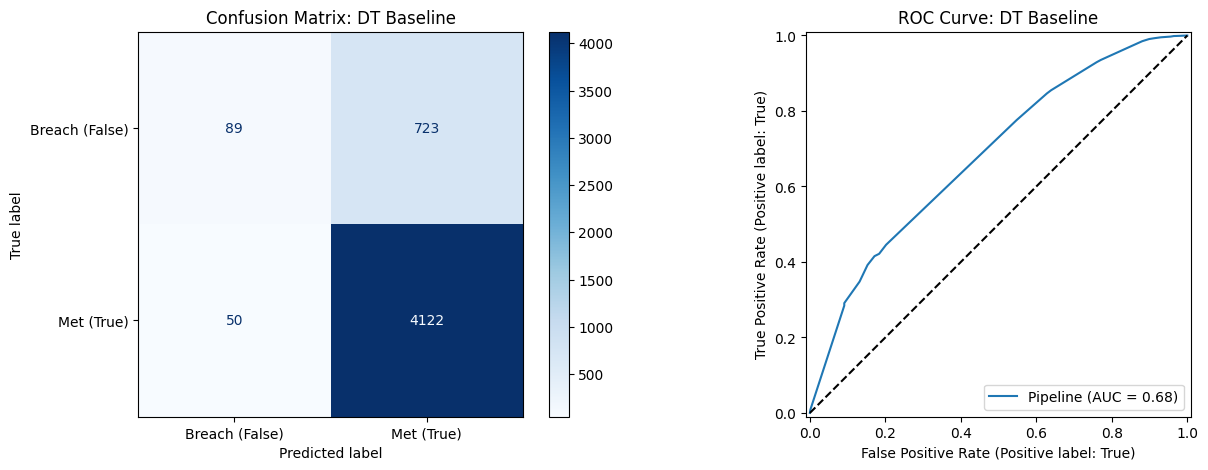


INTERNAL COMPARISON TABLE (All Data)


,Cycle,Model_Type,cv_mcc_train_avg,cv_mcc_val_avg,cv_mcc_val_std,holdout_accuracy,holdout_precision,holdout_recall,holdout_f1,holdout_mcc,holdout_auc,Best_Params
0,Baseline,DT Baseline,0.2188,0.2087,0.0309,0.8449,0.6403,0.1096,0.1872,0.2189,0.6824,"depth=5, leaf=50, No Weights"



FINAL COMPARISON TABLE


,Model Name,Accuracy,Recall (Breach),MCC Score,AUC Score
0,DT Baseline,0.8449,0.1096,0.2189,0.6824


In [10]:
## DT baseline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import cross_validate, StratifiedShuffleSplit
from sklearn.metrics import (classification_report, matthews_corrcoef, make_scorer,
                             roc_auc_score, ConfusionMatrixDisplay, RocCurveDisplay)

# --- 1. Setup Scorers and Preprocessing ---
mcc_scorer = make_scorer(matthews_corrcoef)
breach_label = 'False'  # Confirmed: False means SLA Fail

numeric_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='median'))])
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))
])

preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, num_cols),
    ('cat', categorical_transformer, cat_cols)
])

# --- 2. Define Pipeline (Baseline: No Weights) ---
dt_model = DecisionTreeClassifier(max_depth=5, min_samples_leaf=50, class_weight=None, random_state=42)
dt_pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', dt_model)])

# --- 3. Cross-Validation (Stability Check) ---
print("=== DECISION TREE: CROSS-VALIDATION (STABILITY CHECK) ===")
cv_ss = StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=42)
scoring = {'mcc': mcc_scorer, 'recall': 'recall'}

cv_results = cross_validate(
    dt_pipeline, X_train, y_train,
    cv=cv_ss,
    scoring=scoring,
    return_train_score=True
)

# --- 4. Final Fit & Holdout Predictions ---
dt_pipeline.fit(X_train, y_train)
y_pred = dt_pipeline.predict(X_test)
# probabilities for AUC (Index 0 is usually 'False' if sorted alphabetically)
#y_proba = dt_pipeline.predict_proba(X_test)[:, 0]
y_proba = dt_pipeline.predict_proba(X_test)[:, 1]
report = classification_report(y_test, y_pred, output_dict=True)

# --- 5. Store Results in Tournament Table ---
results.append({
    'Cycle': 'Baseline',
    'Model_Type': 'DT Baseline',
    # Stability Diagnostics
    'cv_mcc_train_avg': round(cv_results['train_mcc'].mean(), 4),
    'cv_mcc_val_avg':   round(cv_results['test_mcc'].mean(), 4),
    'cv_mcc_val_std':   round(cv_results['test_mcc'].std(), 4),
    # Final Holdout Scores
    'holdout_accuracy':  round(report['accuracy'], 4),
    'holdout_precision': round(report[breach_label]['precision'], 4),
    'holdout_recall':    round(report[breach_label]['recall'], 4),
    'holdout_f1':        round(report[breach_label]['f1-score'], 4),
    'holdout_mcc':       round(matthews_corrcoef(y_test, y_pred), 4),
    'holdout_auc':       round(roc_auc_score(y_test, y_proba), 4),
    'Best_Params': "depth=5, leaf=50, No Weights"
})

# --- 6. Visualizations (Confusion Matrix & ROC) ---
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

ConfusionMatrixDisplay.from_estimator(
    dt_pipeline, X_test, y_test,
    display_labels=['Breach (False)', 'Met (True)'],
    cmap='Blues', ax=ax[0]
)
ax[0].set_title("Confusion Matrix: DT Baseline")

RocCurveDisplay.from_estimator(dt_pipeline, X_test, y_test, ax=ax[1])
ax[1].set_title("ROC Curve: DT Baseline")
plt.plot([0, 1], [0, 1], 'k--')
plt.show()

# --- 7. Print Tree Logic and Results Table ---

# --- 7. THE MASTER DISPLAY (Full Table + Slide Version) ---
import pandas as pd

# 1. Create the base DataFrame from your list
results_df = pd.DataFrame(results)

# 2. THE FULL TABLE: Show everything (No rows or columns hidden)
# This removes duplicates so the list doesn't get infinitely long
full_table = results_df.drop_duplicates(subset=['Model_Type'], keep='last')

print("\n" + "="*30)
print("INTERNAL COMPARISON TABLE (All Data)")
print("="*30)
display(full_table)

# 3. THE SLIDE TABLE: Your "Tournament" version
cols_to_show = ['Model_Type', 'holdout_accuracy', 'holdout_recall', 'holdout_mcc', 'holdout_auc']
existing_cols = [c for c in cols_to_show if c in full_table.columns]

slide_table = full_table[existing_cols].copy()
slide_table.columns = ['Model Name', 'Accuracy', 'Recall (Breach)', 'MCC Score', 'AUC Score']

print("\n" + "="*30)
print("FINAL COMPARISON TABLE")
print("="*30)
display(slide_table)


######


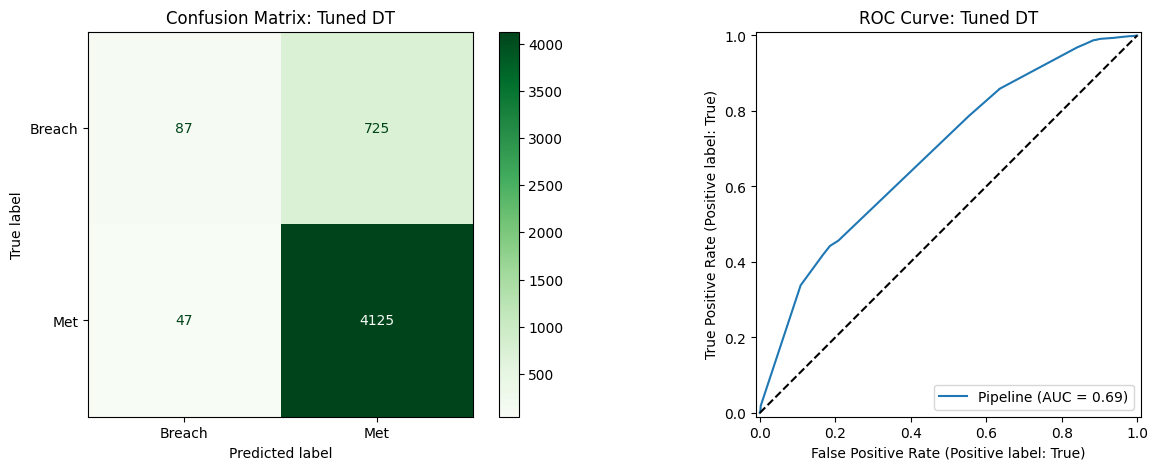


INTERNAL COMPARISON TABLE (All Data)


,Cycle,Model_Type,cv_mcc_train_avg,cv_mcc_val_avg,cv_mcc_val_std,holdout_accuracy,holdout_precision,holdout_recall,holdout_f1,holdout_mcc,holdout_auc,Best_Params
0,Baseline,DT Baseline,0.2188,0.2087,0.0309,0.8449,0.6403,0.1096,0.1872,0.2189,0.6824,"depth=5, leaf=50, No Weights"
1,Stage 1,DT GridSearch,0.2354,0.2127,0.0300,0.8451,0.8505,0.9887,0.9144,0.2189,0.6864,"{'classifier__criterion': 'entropy', 'classifi..."



FINAL COMPARISON TABLE (Slide Version)


,Model Name,Accuracy,Recall (Breach),MCC Score,AUC Score
0,DT Baseline,0.8449,0.1096,0.2189,0.6824
1,DT GridSearch,0.8451,0.9887,0.2189,0.6864


In [11]:
## ---New New Stage 1 with GridSearchCV: DECISION TREE BLOCK ---
# --- 1. Imports ---
from sklearn.model_selection import GridSearchCV, cross_validate, StratifiedShuffleSplit
from sklearn.metrics import (classification_report, confusion_matrix, matthews_corrcoef,
                             accuracy_score, recall_score, precision_score, f1_score,
                             roc_auc_score, make_scorer,
                             ConfusionMatrixDisplay, RocCurveDisplay)
import matplotlib.pyplot as plt
import pandas as pd

# --- 2. Setup ---
cv_10 = StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=42)
mcc_scorer = make_scorer(matthews_corrcoef)

# --- 3. Pipeline & Grid Search ---
pipe_dt = Pipeline([
    ("preprocessor", preprocessor),
    ("classifier", DecisionTreeClassifier(random_state=42))
])

param_grid_dt = {
    "classifier__max_depth": [5, 8, 15],
    "classifier__criterion": ["gini", "entropy", "log_loss"]
}

gs_dt = GridSearchCV(
    estimator=pipe_dt,
    param_grid=param_grid_dt,
    cv=cv_10,
    scoring=mcc_scorer,
    n_jobs=-1,
    return_train_score=True
)
gs_dt.fit(X_train, y_train)

# --- 4. Validate Best Estimator (Training Data Folds) ---
dt_best_model = gs_dt.best_estimator_
val_results = cross_validate(
    dt_best_model, X_train, y_train,
    cv=cv_10, scoring=mcc_scorer, return_train_score=True
)

final_train_mcc = val_results['train_score'].mean()
final_val_mcc = val_results['test_score'].mean()
final_val_std = val_results['test_score'].std()

# --- 5. Holdout Predictions (Final Test) ---
dt_pred = dt_best_model.predict(X_test)
dt_proba = dt_best_model.predict_proba(X_test)[:, 1]

# --- 6. Store and Override Logic (Fixes NaNs and Duplicates) ---
new_dt_entry = {
    'Cycle': 'Stage 1',
    'Model_Type': 'DT GridSearch',
    'cv_mcc_train_avg': round(final_train_mcc, 4),
    'cv_mcc_val_avg':   round(final_val_mcc, 4),
    'cv_mcc_val_std':   round(final_val_std, 4),
    'holdout_accuracy': round(accuracy_score(y_test, dt_pred), 4),
    'holdout_precision':round(precision_score(y_test, dt_pred), 4), # Calculated correctly
    'holdout_recall':   round(recall_score(y_test, dt_pred), 4),
    'holdout_f1':       round(f1_score(y_test, dt_pred), 4),        # Calculated correctly
    'holdout_mcc':      round(matthews_corrcoef(y_test, dt_pred), 4),
    'holdout_auc':      round(roc_auc_score(y_test, dt_proba), 4),
    'Best_Params': str(gs_dt.best_params_)
}

# Override Logic
found = False
for i, row in enumerate(results):
    if row.get('Model_Type') == 'DT GridSearch':
        results[i] = new_dt_entry
        found = True
        break
if not found:
    results.append(new_dt_entry)


# --- 7. Visualizations (RESTORED) ---
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# Confusion Matrix
ConfusionMatrixDisplay.from_estimator(
    dt_best_model, X_test, y_test,
    display_labels=['Breach', 'Met'], cmap='Greens', ax=ax[0]
)
ax[0].set_title("Confusion Matrix: Tuned DT")

# ROC Curve
RocCurveDisplay.from_estimator(dt_best_model, X_test, y_test, ax=ax[1])
ax[1].set_title("ROC Curve: Tuned DT")
plt.plot([0, 1], [0, 1], 'k--')
plt.show()

# --- 8. THE MASTER DISPLAY (Full Table + Slide Version) ---
# 1. Create the base DataFrame
results_df = pd.DataFrame(results)

# 2. THE FULL TABLE: Show everything (Deduplicated)
full_table = results_df.drop_duplicates(subset=['Model_Type'], keep='last')

print("\n" + "="*30)
print("INTERNAL COMPARISON TABLE (All Data)")
print("="*30)
display(full_table)

# 3. THE SLIDE TABLE: Your "Tournament" version
cols_to_show = ['Model_Type', 'holdout_accuracy', 'holdout_recall', 'holdout_mcc', 'holdout_auc']
existing_cols = [c for c in cols_to_show if c in full_table.columns]

slide_table = full_table[existing_cols].copy()
slide_table.columns = ['Model Name', 'Accuracy', 'Recall (Breach)', 'MCC Score', 'AUC Score']

print("\n" + "="*30)
print("FINAL COMPARISON TABLE (Slide Version)")
print("="*30)
display(slide_table)



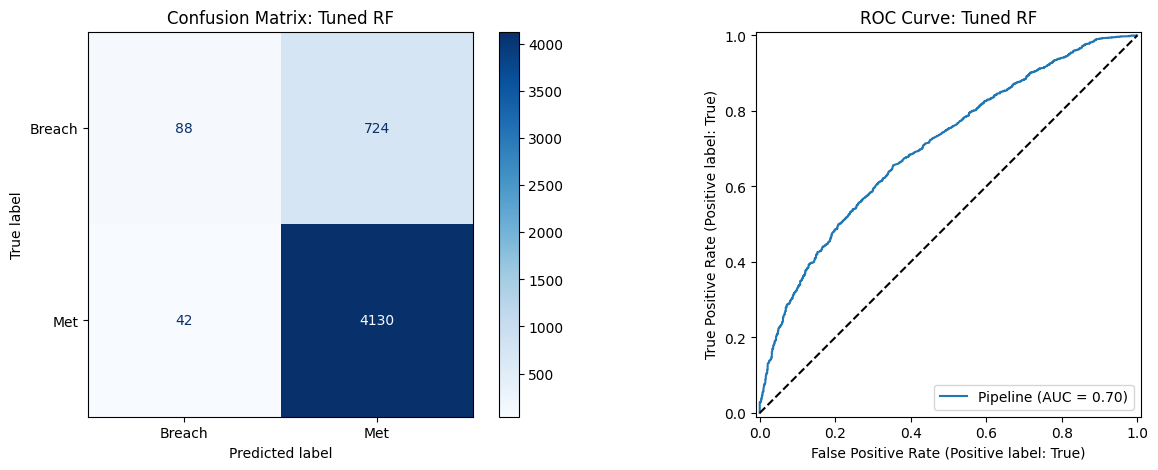


=== INTERNAL COMPARISON TABLE  ===


,Cycle,Model_Type,cv_mcc_train_avg,cv_mcc_val_avg,cv_mcc_val_std,holdout_accuracy,holdout_precision,holdout_recall,holdout_f1,holdout_mcc,holdout_auc,Best_Params
0,Baseline,DT Baseline,0.2188,0.2087,0.0309,0.8449,0.6403,0.1096,0.1872,0.2189,0.6824,"depth=5, leaf=50, No Weights"
1,Stage 1,DT GridSearch,0.2354,0.2127,0.0300,0.8451,0.8505,0.9887,0.9144,0.2189,0.6864,"{'classifier__criterion': 'entropy', 'classifi..."
2,Stage 1,RF GridSearch,0.2364,0.2210,0.0275,0.8463,0.8508,0.9899,0.9151,0.2278,0.7041,"{'classifier__criterion': 'gini', 'classifier_..."



=== FINAL COMPARISON TABLE ===


,Model Name,Accuracy,Recall (Breach),MCC Score,AUC Score
0,DT Baseline,0.8449,0.1096,0.2189,0.6824
1,DT GridSearch,0.8451,0.9887,0.2189,0.6864
2,RF GridSearch,0.8463,0.9899,0.2278,0.7041


In [12]:
## New New STage 1  Random Forest

# --- RANDOM FOREST BLOCK ---
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, f1_score

# 1. Pipeline
pipe_rf = Pipeline([
    ("preprocessor", preprocessor),
    ("classifier", RandomForestClassifier(random_state=42))
])

# 2. Param Grid
param_grid_rf = {
    "classifier__n_estimators": [50, 200],
    "classifier__max_depth": [5, 10],
    "classifier__criterion": ["gini", "entropy"]
}

# 3. FIND THE BEST MODEL (Grid Search)
gs_rf = GridSearchCV(
    estimator=pipe_rf,
    param_grid=param_grid_rf,
    cv=cv_10,
    scoring=mcc_scorer,
    n_jobs=-1,
    return_train_score=True
)
gs_rf.fit(X_train, y_train)

# 4. VALIDATE THE BEST ESTIMATOR
rf_best_model = gs_rf.best_estimator_
val_results_rf = cross_validate(
    rf_best_model, X_train, y_train,
    cv=cv_10, scoring=mcc_scorer, return_train_score=True
)

final_train_mcc_rf = val_results_rf['train_score'].mean()
final_val_mcc_rf = val_results_rf['test_score'].mean()
final_val_std_rf = val_results_rf['test_score'].std()

# 5. TEST ON HOLDOUT
rf_pred = rf_best_model.predict(X_test)
rf_proba = rf_best_model.predict_proba(X_test)[:, 1]

# 6. STORE & OVERRIDE LOGIC (Fixed: Prevents Duplicates & NaNs)
new_rf_entry = {
    'Cycle': 'Stage 1',
    'Model_Type': 'RF GridSearch',
    'cv_mcc_train_avg': round(final_train_mcc_rf, 4),
    'cv_mcc_val_avg':   round(final_val_mcc_rf, 4),
    'cv_mcc_val_std':   round(final_val_std_rf, 4),
    'holdout_accuracy': round(accuracy_score(y_test, rf_pred), 4),
    'holdout_precision':round(precision_score(y_test, rf_pred), 4),
    'holdout_recall':   round(recall_score(y_test, rf_pred), 4),
    'holdout_f1':       round(f1_score(y_test, rf_pred), 4),
    'holdout_mcc':      round(matthews_corrcoef(y_test, rf_pred), 4),
    'holdout_auc':      round(roc_auc_score(y_test, rf_proba), 4),
    'Best_Params': str(gs_rf.best_params_)
}

# Find if RF GridSearch already exists and replace it
found = False
for i, row in enumerate(results):
    if row.get('Model_Type') == 'RF GridSearch':
        results[i] = new_rf_entry
        found = True
        break
if not found:
    results.append(new_rf_entry)

# 7. VISUALIZATIONS
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ConfusionMatrixDisplay.from_estimator(rf_best_model, X_test, y_test,
                                      display_labels=['Breach', 'Met'], cmap='Blues', ax=ax[0])
ax[0].set_title("Confusion Matrix: Tuned RF")

RocCurveDisplay.from_estimator(rf_best_model, X_test, y_test, ax=ax[1])
ax[1].set_title("ROC Curve: Tuned RF")
plt.plot([0, 1], [0, 1], 'k--')
plt.show()

# 8. THE MASTER DISPLAY (Full Table + Slide Version)
results_df = pd.DataFrame(results)
full_table = results_df.drop_duplicates(subset=['Model_Type'], keep='last')

print("\n=== INTERNAL COMPARISON TABLE  ===")
display(full_table)

cols_to_show = ['Model_Type', 'holdout_accuracy', 'holdout_recall', 'holdout_mcc', 'holdout_auc']
slide_table = full_table[cols_to_show].copy()
slide_table.columns = ['Model Name', 'Accuracy', 'Recall (Breach)', 'MCC Score', 'AUC Score']

print("\n=== FINAL COMPARISON TABLE ===")
display(slide_table)

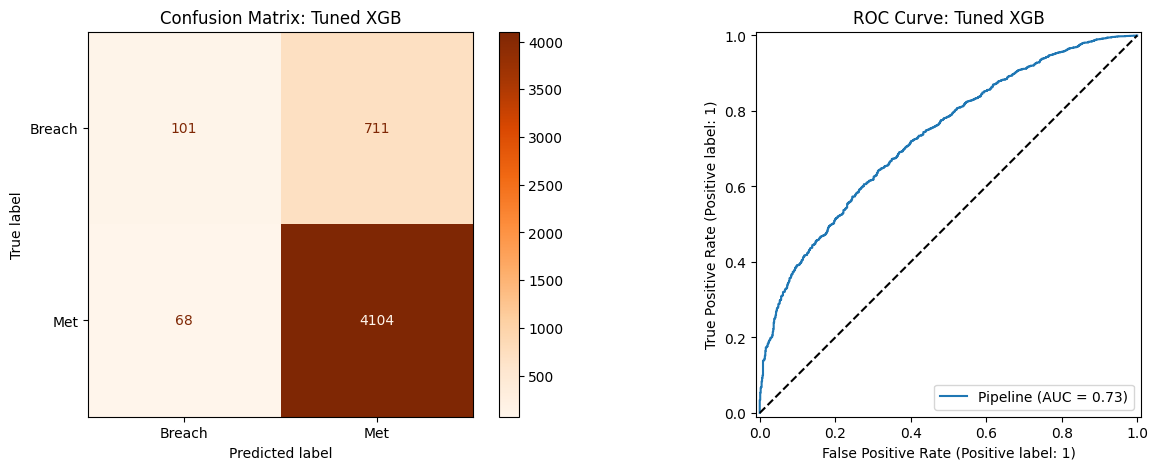


=== INTERNAL COMPARISON TABLE ===


,Cycle,Model_Type,cv_mcc_train_avg,cv_mcc_val_avg,cv_mcc_val_std,holdout_accuracy,holdout_precision,holdout_recall,holdout_f1,holdout_mcc,holdout_auc,Best_Params
0,Baseline,DT Baseline,0.2188,0.2087,0.0309,0.8449,0.6403,0.1096,0.1872,0.2189,0.6824,"depth=5, leaf=50, No Weights"
1,Stage 1,DT GridSearch,0.2354,0.2127,0.0300,0.8451,0.8505,0.9887,0.9144,0.2189,0.6864,"{'classifier__criterion': 'entropy', 'classifi..."
2,Stage 1,RF GridSearch,0.2364,0.2210,0.0275,0.8463,0.8508,0.9899,0.9151,0.2278,0.7041,"{'classifier__criterion': 'gini', 'classifier_..."
3,Stage 1,XGB GridSearch,0.3677,0.2170,0.0246,0.8437,0.8523,0.9837,0.9133,0.2205,0.7318,"{'classifier__max_depth': 4, 'classifier__n_es..."



=== FINAL COMPARISON TABLE  ===


,Model Name,Accuracy,Recall (Breach),MCC Score,AUC Score
0,DT Baseline,0.8449,0.1096,0.2189,0.6824
1,DT GridSearch,0.8451,0.9887,0.2189,0.6864
2,RF GridSearch,0.8463,0.9899,0.2278,0.7041
3,XGB GridSearch,0.8437,0.9837,0.2205,0.7318


In [13]:
## New New Stage 1 XGB

# --- XGBOOST BLOCK ---
from xgboost import XGBClassifier
from sklearn.metrics import precision_score, f1_score

# 1. Pipeline
pipe_xgb = Pipeline([
    ("preprocessor", preprocessor),
    ("classifier", XGBClassifier(random_state=42, eval_metric="logloss"))
])

# 2. Param Grid (Following Worksheet Cell 14)
param_grid_xgb = {
    "classifier__n_estimators": [50, 200],
    "classifier__max_depth": [2, 4, 6]
}

# 3. FIND THE BEST MODEL (Using your Stratified cv_10)
gs_xgb = GridSearchCV(
    estimator=pipe_xgb,
    param_grid=param_grid_xgb,
    cv=cv_10,
    scoring=mcc_scorer,
    n_jobs=-1,
    return_train_score=True
)
gs_xgb.fit(X_train, y_train)

# 4. VALIDATE THE BEST ESTIMATOR
xgb_best_model = gs_xgb.best_estimator_
val_results_xgb = cross_validate(
    xgb_best_model, X_train, y_train,
    cv=cv_10, scoring=mcc_scorer, return_train_score=True
)

# Extract scores
final_train_mcc_xgb = val_results_xgb['train_score'].mean()
final_val_mcc_xgb = val_results_xgb['test_score'].mean()
final_val_std_xgb = val_results_xgb['test_score'].std()

# 5. TEST ON HOLDOUT
xgb_pred = xgb_best_model.predict(X_test)
xgb_proba = xgb_best_model.predict_proba(X_test)[:, 1]

# 6. STORE & OVERRIDE LOGIC (Deduplication + No NaNs)
new_xgb_entry = {
    'Cycle': 'Stage 1',
    'Model_Type': 'XGB GridSearch',
    'cv_mcc_train_avg': round(final_train_mcc_xgb, 4),
    'cv_mcc_val_avg':   round(final_val_mcc_xgb, 4),
    'cv_mcc_val_std':   round(final_val_std_xgb, 4),
    'holdout_accuracy': round(accuracy_score(y_test, xgb_pred), 4),
    'holdout_precision':round(precision_score(y_test, xgb_pred), 4),
    'holdout_recall':   round(recall_score(y_test, xgb_pred), 4),
    'holdout_f1':       round(f1_score(y_test, xgb_pred), 4),
    'holdout_mcc':      round(matthews_corrcoef(y_test, xgb_pred), 4),
    'holdout_auc':      round(roc_auc_score(y_test, xgb_proba), 4),
    'Best_Params': str(gs_xgb.best_params_)
}

# Find if XGB GridSearch already exists and update it
found = False
for i, row in enumerate(results):
    if row.get('Model_Type') == 'XGB GridSearch':
        results[i] = new_xgb_entry
        found = True
        break
if not found:
    results.append(new_xgb_entry)

# 7. VISUALIZATIONS
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

ConfusionMatrixDisplay.from_estimator(
    xgb_best_model, X_test, y_test,
    display_labels=['Breach', 'Met'], cmap='Oranges', ax=ax[0]
)
ax[0].set_title("Confusion Matrix: Tuned XGB")

RocCurveDisplay.from_estimator(xgb_best_model, X_test, y_test, ax=ax[1])
ax[1].set_title("ROC Curve: Tuned XGB")
plt.plot([0, 1], [0, 1], 'k--')
plt.show()

# 8. THE MASTER DISPLAY
results_df = pd.DataFrame(results)
full_table = results_df.drop_duplicates(subset=['Model_Type'], keep='last')

print("\n=== INTERNAL COMPARISON TABLE ===")
display(full_table)

cols_to_show = ['Model_Type', 'holdout_accuracy', 'holdout_recall', 'holdout_mcc', 'holdout_auc']
slide_table = full_table[cols_to_show].copy()
slide_table.columns = ['Model Name', 'Accuracy', 'Recall (Breach)', 'MCC Score', 'AUC Score']

print("\n=== FINAL COMPARISON TABLE  ===")
display(slide_table)

In [14]:
### Stage 2

from sklearn.compose import ColumnTransformer


# --- 1. Setup Scorers and Preprocessing ---
mcc_scorer = make_scorer(matthews_corrcoef)
breach_label = 'False'  # Confirmed: False means SLA Fail

numeric_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='median'))])
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))
])

preprocessor_s2 = ColumnTransformer(transformers=[
    ('num', numeric_transformer, num_cols),
    ('cat', categorical_transformer, cat_cols)
])

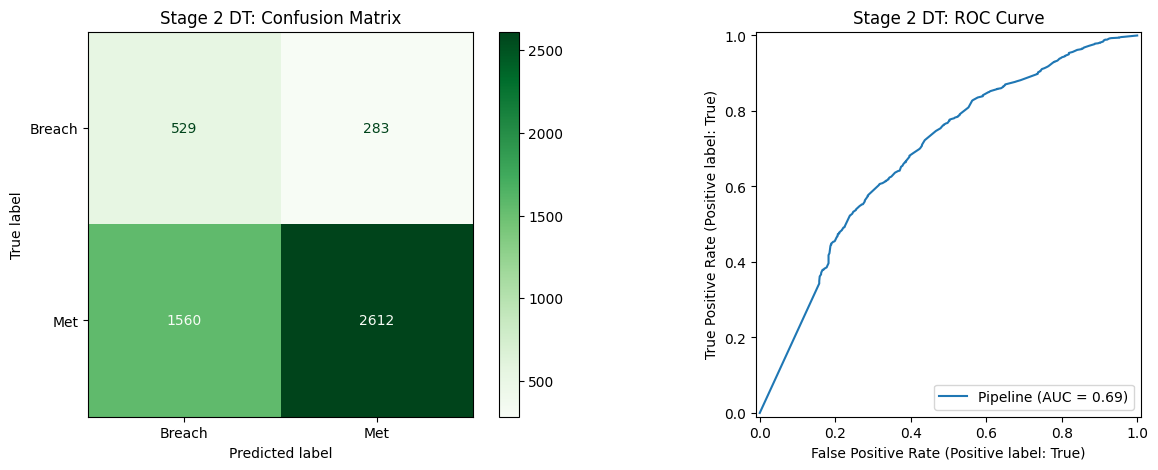


STAGE 2 DIAGNOSTICS: PFI

TOP 10 FEATURES BY PERMUTATION IMPORTANCE:


,Feature,Importance
13,cat__assignment_group_grp,0.118040
7,cat__category,0.069333
12,cat__subcategory_grp,0.053051
10,cat__priority,0.043501
0,num__opened_hour,0.020263
1,num__opened_dayofweek,0.016377
11,cat__location_grp,0.010110
9,cat__urgency,0.002685
5,num__has_symptom_text,0.002643
3,num__is_business_hours,0.002113



PROJECT TOURNAMENT TABLE: STAGE 1 & 2 COMPARISON


,Cycle,Model_Type,cv_mcc_val_avg,holdout_recall,holdout_mcc,holdout_auc
0,Baseline,DT Baseline,0.2087,0.1096,0.2189,0.6824
2,Stage 1,RF GridSearch,0.2210,0.9899,0.2278,0.7041
3,Stage 1,XGB GridSearch,0.2170,0.9837,0.2205,0.7318
1,Stage 1,DT GridSearch,0.2127,0.9887,0.2189,0.6864
4,Stage 2 - Weighted,DT Hybrid-Weighted,0.1975,0.6261,0.2077,0.6877



MASTER RESULTS: FULL METRIC BREAKDOWN


,Cycle,Model_Type,cv_mcc_train_avg,cv_mcc_val_avg,cv_mcc_val_std,holdout_accuracy,holdout_precision,holdout_recall,holdout_f1,holdout_mcc,holdout_auc,Best_Params
0,Baseline,DT Baseline,0.2188,0.2087,0.0309,0.8449,0.6403,0.1096,0.1872,0.2189,0.6824,"depth=5, leaf=50, No Weights"
1,Stage 1,DT GridSearch,0.2354,0.2127,0.0300,0.8451,0.8505,0.9887,0.9144,0.2189,0.6864,"{'classifier__criterion': 'entropy', 'classifi..."
2,Stage 1,RF GridSearch,0.2364,0.2210,0.0275,0.8463,0.8508,0.9899,0.9151,0.2278,0.7041,"{'classifier__criterion': 'gini', 'classifier_..."
3,Stage 1,XGB GridSearch,0.3677,0.2170,0.0246,0.8437,0.8523,0.9837,0.9133,0.2205,0.7318,"{'classifier__max_depth': 4, 'classifier__n_es..."
4,Stage 2 - Weighted,DT Hybrid-Weighted,0.4024,0.1975,0.0122,0.6302,0.9022,0.6261,0.7392,0.2077,0.6877,"{'classifier__class_weight': 'balanced', 'clas..."


In [15]:
## stage 2 New Decision Tree

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, cross_validate
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, matthews_corrcoef, roc_auc_score,
                             ConfusionMatrixDisplay, RocCurveDisplay)
from sklearn.inspection import permutation_importance

# --- 1. Model & "Relaxed" Stage 2 Upgrade Grid ---
dt_s2 = DecisionTreeClassifier(random_state=42)

# Using the "Relaxed" grid to fix the Recall/Accuracy drop
param_grid_dt_s2 = {
    "classifier__max_depth": [15, 20, 25, None],        # Relaxing depth
    "classifier__criterion": ["gini", "entropy"],
    #"classifier__class_weight": [{0: 1, 1: 1.5}, {0: 1, 1: 2}],
   # "classifier__class_weight": [{0: 1, 1: 3}, {0: 1, 1: 5}, {0: 1, 1: 10}],
    "classifier__class_weight": ["balanced"],           # Keeping balanced weights
    "classifier__min_samples_leaf": [1, 2, 5],          # Allowing smaller patterns
    "classifier__min_samples_split": [2, 5],
    "classifier__max_features": [None]                  # See all 14 fields
}

# --- 2. Pipeline (Using your 14-field preprocessor_s2) ---
pipe_dt_s2 = Pipeline([
    ("preprocessor", preprocessor_s2),
    ("classifier", dt_s2)
])

cv_strat = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)

# --- 3. GridSearch & VALIDATE ---
# Note: Ensure mcc_scorer is defined in your environment
gs_dt_s2 = GridSearchCV(
    pipe_dt_s2,
    param_grid_dt_s2,
    cv=cv_strat,
    scoring=mcc_scorer,
    n_jobs=-1,
    return_train_score=True
)
gs_dt_s2.fit(X_train, y_train)

# Extract best model and run detailed Cross-Validation
dt_s2_best = gs_dt_s2.best_estimator_
val_results_s2 = cross_validate(
    dt_s2_best, X_train, y_train,
    cv=cv_strat, scoring=mcc_scorer, return_train_score=True
)

# --- 4. Holdout Predictions ---
dt_s2_pred = dt_s2_best.predict(X_test)
dt_s2_proba = dt_s2_best.predict_proba(X_test)[:, 1]

# --- 5. Store Logic (Cycle: Stage 2) ---
new_dt_s2_entry = {
    'Cycle': 'Stage 2 - Weighted',
    'Model_Type': 'DT Hybrid-Weighted',
    'cv_mcc_train_avg': round(val_results_s2['train_score'].mean(), 4),
    'cv_mcc_val_avg':   round(val_results_s2['test_score'].mean(), 4),
    'cv_mcc_val_std':   round(val_results_s2['test_score'].std(), 4),
    'holdout_accuracy': round(accuracy_score(y_test, dt_s2_pred), 4),
    'holdout_precision':round(precision_score(y_test, dt_s2_pred), 4),
    'holdout_recall':   round(recall_score(y_test, dt_s2_pred), 4),
    'holdout_f1':       round(f1_score(y_test, dt_s2_pred), 4),
    'holdout_mcc':      round(matthews_corrcoef(y_test, dt_s2_pred), 4),
    'holdout_auc':      round(roc_auc_score(y_test, dt_s2_proba), 4),
    'Best_Params': str(gs_dt_s2.best_params_)
}
results.append(new_dt_s2_entry)

# --- 6. Visualizations ---
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ConfusionMatrixDisplay.from_estimator(dt_s2_best, X_test, y_test,
                                      display_labels=['Breach', 'Met'], cmap='Greens', ax=ax[0])
ax[0].set_title("Stage 2 DT: Confusion Matrix")
RocCurveDisplay.from_estimator(dt_s2_best, X_test, y_test, ax=ax[1])
ax[1].set_title("Stage 2 DT: ROC Curve")
plt.show()

# --- 7. FIXED DIAGNOSTICS (PFI) ---
print("\n" + "="*30)
print("STAGE 2 DIAGNOSTICS: PFI")
print("="*30)

# Get encoded feature names
feat_names_s2 = dt_s2_best.named_steps['preprocessor'].get_feature_names_out()

# TRANSFORM X_test so column count matches the model's expected input
X_test_transformed = dt_s2_best.named_steps['preprocessor'].transform(X_test)

# Run PFI on the classifier using transformed data
pfi_s2 = permutation_importance(
    dt_s2_best.named_steps['classifier'],
    X_test_transformed,
    y_test,
    n_repeats=5,
    random_state=42,
    scoring=mcc_scorer
)

pfi_df_s2 = pd.DataFrame({
    'Feature': feat_names_s2,
    'Importance': pfi_s2.importances_mean
}).sort_values(by='Importance', ascending=False)

print("\nTOP 10 FEATURES BY PERMUTATION IMPORTANCE:")
display(pfi_df_s2.head(10))

# --- 8. THE TIDY TOURNAMENT TABLE ---
results_df = pd.DataFrame(results)
tournament_table = results_df.drop_duplicates(subset=['Model_Type'], keep='last')
tournament_table = tournament_table.sort_values(by=['Cycle', 'holdout_mcc'], ascending=[True, False])

print("\n" + "="*50)
print("PROJECT TOURNAMENT TABLE: STAGE 1 & 2 COMPARISON")
print("="*50)

display(tournament_table[[
    'Cycle', 'Model_Type', 'cv_mcc_val_avg',
    'holdout_recall', 'holdout_mcc', 'holdout_auc'
]])

# --- 8. THE LONG TABLE (Master Display) ---
# This matches the full table in your screenshot with all 11+ columns
full_results_df = pd.DataFrame(results)

# Keep only the latest run for each model type
master_table = full_results_df.drop_duplicates(subset=['Model_Type'], keep='last')

# Sort to keep Baseline at the top and Stage 2 at the bottom
master_table = master_table.sort_values(by=['Cycle'], ascending=True)

print("\n" + "="*50)
print("MASTER RESULTS: FULL METRIC BREAKDOWN")
print("="*50)

# Display the full dataframe with all metrics
display(master_table)

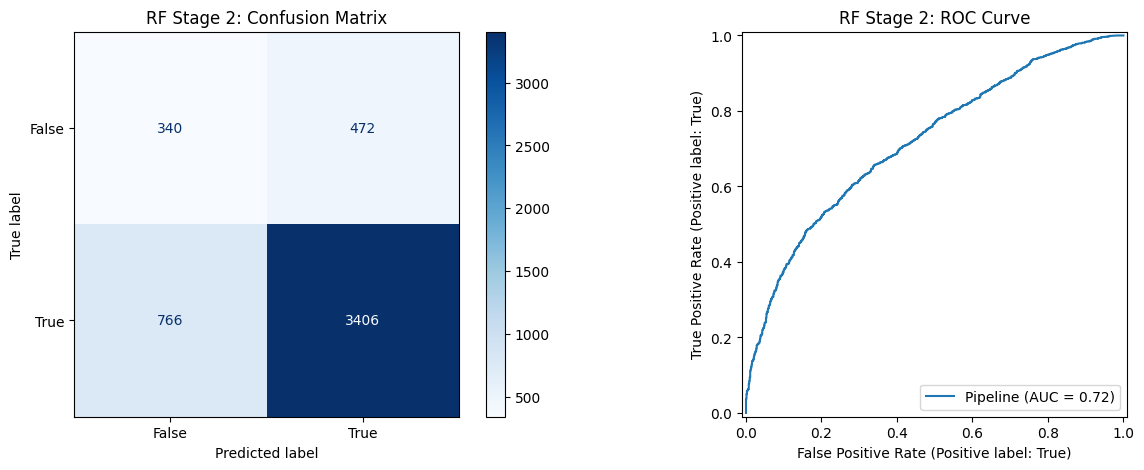

,Feature,Importance
13,cat__assignment_group_grp,0.104234
10,cat__priority,0.060484
12,cat__subcategory_grp,0.038897
7,cat__category,0.036193
1,num__opened_dayofweek,0.021102
11,cat__location_grp,0.011983
0,num__opened_hour,0.011893
9,cat__urgency,0.006939
6,cat__contact_type,0.004020
2,num__is_weekend,0.001896



MASTER RESULTS: TOURNAMENT TABLE


,Cycle,Model_Type,cv_mcc_train_avg,cv_mcc_val_avg,cv_mcc_val_std,holdout_accuracy,holdout_precision,holdout_recall,holdout_f1,holdout_mcc,holdout_auc,Best_Params
0,Baseline,DT Baseline,0.2188,0.2087,0.0309,0.8449,0.6403,0.1096,0.1872,0.2189,0.6824,"depth=5, leaf=50, No Weights"
1,Stage 1,DT GridSearch,0.2354,0.2127,0.0300,0.8451,0.8505,0.9887,0.9144,0.2189,0.6864,"{'classifier__criterion': 'entropy', 'classifi..."
2,Stage 1,RF GridSearch,0.2364,0.2210,0.0275,0.8463,0.8508,0.9899,0.9151,0.2278,0.7041,"{'classifier__criterion': 'gini', 'classifier_..."
3,Stage 1,XGB GridSearch,0.3677,0.2170,0.0246,0.8437,0.8523,0.9837,0.9133,0.2205,0.7318,"{'classifier__max_depth': 4, 'classifier__n_es..."
4,Stage 2 - Weighted,DT Hybrid-Weighted,0.4024,0.1975,0.0122,0.6302,0.9022,0.6261,0.7392,0.2077,0.6877,"{'classifier__class_weight': 'balanced', 'clas..."
5,Stage 2 - Weighted,RF Hybrid-Weighted,0.6499,0.2156,0.0173,0.7516,0.8783,0.8164,0.8462,0.2090,0.7187,"{'classifier__class_weight': 'balanced', 'clas..."



[SUCCESS] RF Results and Table synced to Drive: /content/drive/MyDrive/Colab Notebooks/project_tournament_results.csv


In [16]:
## stage 2 new Random Forest

# ==========================================
# STAGE 2: RF (MINIMAL REFINEMENT + GRAPHS + SAVE)
# ==========================================
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
import os

# 1. Pipeline Setup (Using your 14 engineered fields)
rf_s2 = RandomForestClassifier(random_state=42, bootstrap=True)
pipe_rf_s2 = Pipeline([("preprocessor", preprocessor_s2), ("classifier", rf_s2)])

# 2. Refined GridSearch (Minimal Sampling for speed/refinement)
# param_grid_rf_s2 = {
#     "classifier__n_estimators": [100],
#     "classifier__max_depth": [15, 20],
#     "classifier__max_features": [0.8],                 # Minimal Colsample
#     "classifier__max_samples": [0.8],                  # Minimal Subsample
#     "classifier__class_weight": [{0: 1, 1: 1.5}, {0: 1, 1: 2}]


# }

param_grid_rf_s2 = {
    "classifier__n_estimators": [100, 200],           # Prove if more trees stabilize MCC
    "classifier__max_depth": [15, 20],
    "classifier__max_features": [0.7, 0.9],           # Compare tighter vs. looser colsampling
    "classifier__max_samples": [0.8],                 # Fixed row sampling
    "classifier__class_weight": ["balanced"]

    #"classifier__class_weight": [{0: 1, 1: 1.5}, {0: 1, 1: 2}]

}
cv_strat = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)

gs_rf_s2 = GridSearchCV(pipe_rf_s2, param_grid_rf_s2, cv=cv_strat, scoring=mcc_scorer, n_jobs=-1)
gs_rf_s2.fit(X_train, y_train)

# 3. Full Validation (This fixes the NaN values in the table)
rf_s2_best = gs_rf_s2.best_estimator_
cv_res = cross_validate(rf_s2_best, X_train, y_train, cv=cv_strat, scoring=mcc_scorer, return_train_score=True)

# 4. Holdout Predictions & Metrics
rf_s2_pred = rf_s2_best.predict(X_test)
rf_s2_proba = rf_s2_best.predict_proba(X_test)[:, 1]

results.append({
    'Cycle': 'Stage 2 - Weighted',
    'Model_Type': 'RF Hybrid-Weighted',
    'cv_mcc_train_avg': round(cv_res['train_score'].mean(), 4),
    'cv_mcc_val_avg':   round(cv_res['test_score'].mean(), 4),
    'cv_mcc_val_std':   round(cv_res['test_score'].std(), 4),
    'holdout_accuracy': round(accuracy_score(y_test, rf_s2_pred), 4),
    'holdout_precision':round(precision_score(y_test, rf_s2_pred), 4),
    'holdout_recall':   round(recall_score(y_test, rf_s2_pred), 4),
    'holdout_f1':       round(f1_score(y_test, rf_s2_pred), 4),
    'holdout_mcc':      round(matthews_corrcoef(y_test, rf_s2_pred), 4),
    'holdout_auc':      round(roc_auc_score(y_test, rf_s2_proba), 4),
    'Best_Params': str(gs_rf_s2.best_params_)
})

# 5. GENERATE GRAPHS (The Visual Proof)
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ConfusionMatrixDisplay.from_estimator(rf_s2_best, X_test, y_test, cmap='Blues', ax=ax[0])
ax[0].set_title("RF Stage 2: Confusion Matrix")
RocCurveDisplay.from_estimator(rf_s2_best, X_test, y_test, ax=ax[1])
ax[1].set_title("RF Stage 2: ROC Curve")
plt.show()

# 6. FEATURE IMPORTANCE (PFI)
X_test_trans = rf_s2_best.named_steps['preprocessor'].transform(X_test)
pfi_rf = permutation_importance(rf_s2_best.named_steps['classifier'], X_test_trans, y_test, n_repeats=3, random_state=42, scoring=mcc_scorer)
pfi_df_rf = pd.DataFrame({
    'Feature': rf_s2_best.named_steps['preprocessor'].get_feature_names_out(),
    'Importance': pfi_rf.importances_mean
}).sort_values(by='Importance', ascending=False)
display(pfi_df_rf.head(10))

# 7. UPDATE LONG TABLE & AUTO-SAVE TO DRIVE
save_path = "/content/drive/MyDrive/Colab Notebooks/project_tournament_results.csv"
master_table = pd.DataFrame(results).drop_duplicates(subset=['Model_Type'], keep='last').sort_values(by=['Cycle'], ascending=True)

print("\n" + "="*50)
print("MASTER RESULTS: TOURNAMENT TABLE")
print("="*50)
display(master_table)

try:
    os.makedirs(os.path.dirname(save_path), exist_ok=True)
    master_table.to_csv(save_path, index=False)
    print(f"\n[SUCCESS] RF Results and Table synced to Drive: {save_path}")
except Exception as e:
    print(f"\n[SAVE ERROR] Ensure Drive is mounted: {e}")

In [17]:
# --- RF STAGE 2: FULL FEATURE ANALYSIS ---
feature_names_rf = gs_rf_s2.best_estimator_.named_steps['preprocessor'].get_feature_names_out()

# MDI Importance (Internal)
importances_rf = gs_rf_s2.best_estimator_.named_steps['classifier'].feature_importances_
fi_rf_df = pd.DataFrame({'Feature': feature_names_rf, 'MDI_Importance': importances_rf}).sort_values(by='MDI_Importance', ascending=False)

# PFI Importance (Hold-out)
X_test_trans_rf = gs_rf_s2.best_estimator_.named_steps['preprocessor'].transform(X_test)
pfi_rf = permutation_importance(gs_rf_s2.best_estimator_.named_steps['classifier'], X_test_trans_rf, y_test, n_repeats=3, random_state=42, scoring=mcc_scorer)
pfi_rf_df = pd.DataFrame({'Feature': feature_names_rf, 'PFI_Importance': pfi_rf.importances_mean}).sort_values(by='PFI_Importance', ascending=False)

print("\n[RF] COMPLETE LIST: MDI IMPORTANCE")
with pd.option_context('display.max_rows', None):
    display(fi_rf_df)

print("\n[RF] COMPLETE LIST: PFI IMPORTANCE")
with pd.option_context('display.max_rows', None):
    display(pfi_rf_df)


[RF] COMPLETE LIST: MDI IMPORTANCE


,Feature,MDI_Importance
0,num__opened_hour,0.182836
13,cat__assignment_group_grp,0.178488
7,cat__category,0.134989
11,cat__location_grp,0.120366
1,num__opened_dayofweek,0.114252
12,cat__subcategory_grp,0.105313
10,cat__priority,0.065250
5,num__has_symptom_text,0.036692
9,cat__urgency,0.019517
3,num__is_business_hours,0.012774



[RF] COMPLETE LIST: PFI IMPORTANCE


,Feature,PFI_Importance
13,cat__assignment_group_grp,0.104234
10,cat__priority,0.060484
12,cat__subcategory_grp,0.038897
7,cat__category,0.036193
1,num__opened_dayofweek,0.021102
11,cat__location_grp,0.011983
0,num__opened_hour,0.011893
9,cat__urgency,0.006939
6,cat__contact_type,0.004020
2,num__is_weekend,0.001896


In [18]:
# ==========================================
# RF WORKSHEET: MDI vs PFI (SIDE-BY-SIDE)
# ==========================================
import pandas as pd
from sklearn.inspection import permutation_importance

# 1. Extract the best model from your completed RF GridSearch
rf_best_model = gs_rf_s2.best_estimator_
feature_names_rf = rf_best_model.named_steps['preprocessor'].get_feature_names_out()

# 2. Generate MDI (Internal Model Bias)
# This shows what the model prioritized during training
fi_df = pd.DataFrame({
    'Feature': feature_names_rf,
    'Internal_Bias_MDI': rf_best_model.named_steps['classifier'].feature_importances_
})

# 3. Generate PFI (Actual Predictive Power)
# This measures how much the model actually needs this feature for new data
X_test_trans_rf = rf_best_model.named_steps['preprocessor'].transform(X_test)
pfi_res_rf = permutation_importance(rf_best_model.named_steps['classifier'],
                                    X_test_trans_rf, y_test, n_repeats=3, random_state=42, scoring=mcc_scorer)
pfi_df = pd.DataFrame({
    'Feature': feature_names_rf,
    'Predictive_Power_PFI': pfi_res_rf.importances_mean
})

# 4. Merge Side-by-Side and Sort by PFI
worksheet_df = fi_df.merge(pfi_df, on="Feature")
worksheet_df = worksheet_df.sort_values(by='Predictive_Power_PFI', ascending=False).reset_index(drop=True)

# 5. Display the Full Worksheet
print("\n" + "="*60)
print("RF FEATURE WORKSHEET: ORDERED BY PREDICTIVE POWER (PFI)")
print("="*60)
with pd.option_context('display.max_rows', None):
    display(worksheet_df)


RF FEATURE WORKSHEET: ORDERED BY PREDICTIVE POWER (PFI)


,Feature,Internal_Bias_MDI,Predictive_Power_PFI
0,cat__assignment_group_grp,0.178488,0.104234
1,cat__priority,0.065250,0.060484
2,cat__subcategory_grp,0.105313,0.038897
3,cat__category,0.134989,0.036193
4,num__opened_dayofweek,0.114252,0.021102
5,cat__location_grp,0.120366,0.011983
6,num__opened_hour,0.182836,0.011893
7,cat__urgency,0.019517,0.006939
8,cat__contact_type,0.010078,0.004020
9,num__is_weekend,0.006657,0.001896


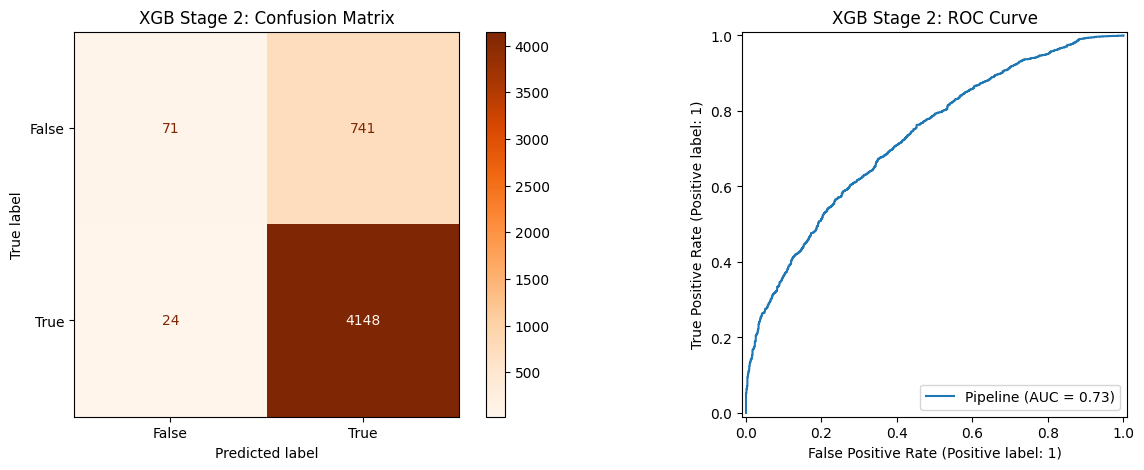


MASTER COMPARISON TABLE (FINAL SYNC)


,Cycle,Model_Type,cv_mcc_train_avg,cv_mcc_val_avg,cv_mcc_val_std,holdout_accuracy,holdout_precision,holdout_recall,holdout_f1,holdout_mcc,holdout_auc,Best_Params
0,Baseline,DT Baseline,0.2188,0.2087,0.0309,0.8449,0.6403,0.1096,0.1872,0.2189,0.6824,"depth=5, leaf=50, No Weights"
1,Stage 1,DT GridSearch,0.2354,0.2127,0.0300,0.8451,0.8505,0.9887,0.9144,0.2189,0.6864,"{'classifier__criterion': 'entropy', 'classifi..."
2,Stage 1,RF GridSearch,0.2364,0.2210,0.0275,0.8463,0.8508,0.9899,0.9151,0.2278,0.7041,"{'classifier__criterion': 'gini', 'classifier_..."
3,Stage 1,XGB GridSearch,0.3677,0.2170,0.0246,0.8437,0.8523,0.9837,0.9133,0.2205,0.7318,"{'classifier__max_depth': 4, 'classifier__n_es..."
4,Stage 2 - Weighted,DT Hybrid-Weighted,0.4024,0.1975,0.0122,0.6302,0.9022,0.6261,0.7392,0.2077,0.6877,"{'classifier__class_weight': 'balanced', 'clas..."
5,Stage 2 - Weighted,RF Hybrid-Weighted,0.6499,0.2156,0.0173,0.7516,0.8783,0.8164,0.8462,0.2090,0.7187,"{'classifier__class_weight': 'balanced', 'clas..."
6,Stage 2 - Weighted,XGB Hybrid-Weighted,0.3975,0.1967,0.0212,0.8465,0.8484,0.9942,0.9156,0.2206,0.7301,"{'classifier__colsample_bytree': 0.9, 'classif..."



[SUCCESS] XGB Matched Results synced to Drive: /content/drive/MyDrive/Colab Notebooks/project_tournament_results.csv

PROJECT: STAGE 1 & 2 COMPARISON


,Cycle,Model_Type,cv_mcc_val_avg,holdout_recall,holdout_mcc,holdout_auc
0,Baseline,DT Baseline,0.2087,0.1096,0.2189,0.6824
2,Stage 1,RF GridSearch,0.2210,0.9899,0.2278,0.7041
3,Stage 1,XGB GridSearch,0.2170,0.9837,0.2205,0.7318
1,Stage 1,DT GridSearch,0.2127,0.9887,0.2189,0.6864
6,Stage 2 - Weighted,XGB Hybrid-Weighted,0.1967,0.9942,0.2206,0.7301
5,Stage 2 - Weighted,RF Hybrid-Weighted,0.2156,0.8164,0.2090,0.7187
4,Stage 2 - Weighted,DT Hybrid-Weighted,0.1975,0.6261,0.2077,0.6877


In [19]:
# ==========================================
# STAGE 2: XGBOOST (MATCHED RF PARAMETERS)
# ==========================================
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import os

# 1. Pipeline Setup
#xgb_s2 = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_s2 = XGBClassifier(random_state=42, eval_metric='logloss')
pipe_xgb_s2 = Pipeline([("preprocessor", preprocessor_s2), ("classifier", xgb_s2)])

# 2. Matched GridSearch (Mirroring your RF Refinement)
# param_grid_xgb_s2 = {
#     "classifier__n_estimators": [100, 200],           # Mirroring RF tree count
#     "classifier__max_depth": [15, 20],                # Mirroring RF depth relaxation
#     "classifier__colsample_bytree": [0.7, 0.9],       # Mirroring RF max_features
#     "classifier__subsample": [0.8],                   # Mirroring RF max_samples
#     "classifier__scale_pos_weight": [1.5, 2],         # Mirroring RF class weights
#     "classifier__learning_rate": [0.1]

param_grid_xgb_s2 = {
    "classifier__n_estimators": [100, 200],
    "classifier__max_depth": [5, 8, 10],
    "classifier__colsample_bytree": [0.7, 0.9],
    "classifier__subsample": [0.8],
    "classifier__scale_pos_weight": [4, 5, 6],
    "classifier__learning_rate": [0.1]
}


cv_strat = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)

gs_xgb_s2 = GridSearchCV(pipe_xgb_s2, param_grid_xgb_s2, cv=cv_strat, scoring=mcc_scorer, n_jobs=-1)
gs_xgb_s2.fit(X_train, y_train)

# 3. Validation & Metrics (Fixing NaNs)
xgb_s2_best = gs_xgb_s2.best_estimator_
cv_res_xgb = cross_validate(xgb_s2_best, X_train, y_train, cv=cv_strat, scoring=mcc_scorer, return_train_score=True)

# 4. Predictions
xgb_s2_pred = xgb_s2_best.predict(X_test)
xgb_s2_proba = xgb_s2_best.predict_proba(X_test)[:, 1]

# 5. Append to Results (All 11 columns for a tidy table)
results.append({
    'Cycle': 'Stage 2 - Weighted',
    'Model_Type': 'XGB Hybrid-Weighted',
    'cv_mcc_train_avg': round(cv_res_xgb['train_score'].mean(), 4),
    'cv_mcc_val_avg':   round(cv_res_xgb['test_score'].mean(), 4),
    'cv_mcc_val_std':   round(cv_res_xgb['test_score'].std(), 4),
    'holdout_accuracy': round(accuracy_score(y_test, xgb_s2_pred), 4),
    'holdout_precision':round(precision_score(y_test, xgb_s2_pred), 4),
    'holdout_recall':   round(recall_score(y_test, xgb_s2_pred), 4),
    'holdout_f1':       round(f1_score(y_test, xgb_s2_pred), 4),
    'holdout_mcc':      round(matthews_corrcoef(y_test, xgb_s2_pred), 4),
    'holdout_auc':      round(roc_auc_score(y_test, xgb_s2_proba), 4),
    'Best_Params': str(gs_xgb_s2.best_params_)
})

# 6. GENERATE GRAPHS
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ConfusionMatrixDisplay.from_estimator(xgb_s2_best, X_test, y_test, cmap='Oranges', ax=ax[0])
ax[0].set_title("XGB Stage 2: Confusion Matrix")
RocCurveDisplay.from_estimator(xgb_s2_best, X_test, y_test, ax=ax[1])
ax[1].set_title("XGB Stage 2: ROC Curve")
plt.show()

# 7. UPDATE MASTER TABLE & SAVE
save_path = "/content/drive/MyDrive/Colab Notebooks/project_tournament_results.csv"
master_table = pd.DataFrame(results).drop_duplicates(subset=['Model_Type'], keep='last').sort_values(by=['Cycle'], ascending=True)

print("\n" + "="*50)
print("MASTER COMPARISON TABLE (FINAL SYNC)")
print("="*50)
display(master_table)

try:
    os.makedirs(os.path.dirname(save_path), exist_ok=True)
    master_table.to_csv(save_path, index=False)
    print(f"\n[SUCCESS] XGB Matched Results synced to Drive: {save_path}")
except Exception as e:
    print(f"\n[SAVE ERROR]: {e}")

    # --- 8. THE TIDY TOURNAMENT TABLE ---
results_df = pd.DataFrame(results)
tournament_table = results_df.drop_duplicates(subset=['Model_Type'], keep='last')
tournament_table = tournament_table.sort_values(by=['Cycle', 'holdout_mcc'], ascending=[True, False])

print("\n" + "="*50)
print("PROJECT: STAGE 1 & 2 COMPARISON")
print("="*50)

display(tournament_table[[
    'Cycle', 'Model_Type', 'cv_mcc_val_avg',
    'holdout_recall', 'holdout_mcc', 'holdout_auc'
]])


In [20]:
## generate FI and PFI from winner model XGB stage 2
import pandas as pd
import numpy as np
from sklearn.inspection import permutation_importance
import shap

# --- A. LINK TO YOUR STAGE 2 VARIABLES ---
# We use the specific best_estimator from your Stage 2 GridSearch
target_model = xgb_s2_best
# We use the preprocessor specifically defined for Stage 2
target_preprocessor = xgb_s2_best.named_steps['preprocessor']
# Get the 14-field names
target_feature_names = target_preprocessor.get_feature_names_out()

# --- B. CALCULATE PFI (Permutation Importance) ---
# Ordered by PFI as per your worksheet requirement
pfi_result = permutation_importance(
    target_model, X_test, y_test,
    n_repeats=5, random_state=42, scoring=mcc_scorer
)

# --- C. CALCULATE FI (Internal Gini Importance) ---
fi_values = target_model.named_steps['classifier'].feature_importances_

# # --- D. COMPILE COMPARISON TABLE ---
# importance_df = pd.DataFrame({
#     'Feature': target_feature_names,
#     'FI_Gini_Importance': fi_values,
#     'PFI_Permutation_Importance': pfi_result.importances_mean
# }).sort_values(by='PFI_Permutation_Importance', ascending=False)

# display(importance_df)

# --- D. COMPILE COMPARISON TABLE ---
importance_df = pd.DataFrame({
    'Feature': target_feature_names,
    'Gini_Importance (FI)': fi_values,
    'MCC_Drop_Importance (PFI)': pfi_result.importances_mean  # Rename here for clarity
}).sort_values(by='MCC_Drop_Importance (PFI)', ascending=False)

# Add a ranking column to make it easy to talk about in 7 mins
importance_df['PFI_Rank'] = range(1, len(importance_df) + 1)

display(importance_df)






,Feature,Gini_Importance (FI),MCC_Drop_Importance (PFI),PFI_Rank
4,num__has_cmdb_ci,0.039392,0.148869,1
5,num__has_symptom_text,0.046758,0.034750,2
11,cat__location_grp,0.047776,0.024129,3
10,cat__priority,0.314422,0.023838,4
3,num__is_business_hours,0.047137,0.021210,5
1,num__opened_dayofweek,0.046329,0.020457,6
6,cat__contact_type,0.062186,0.016710,7
13,cat__assignment_group_grp,0.069262,0.015085,8
9,cat__urgency,0.069472,0.012926,9
0,num__opened_hour,0.045605,0.007345,10


In [21]:
import os, joblib, pandas as pd, json
from sklearn.metrics import matthews_corrcoef

# 1. Config
PREFIX = "2xgb2_"
save_path = "/content/drive/MyDrive/Colab Notebooks/"

# 2. Save Stage 2 XGB Model
target_model = gs_xgb_s2.best_estimator_
joblib.dump(target_model, f"{save_path}{PREFIX}xgb_best_pipeline_sklearn180.joblib")

# 3. Save Background (300 records - MATCHING SCHOOL)
X_bg = X_train.sample(n=300, random_state=42)
X_bg.to_csv(f"{save_path}{PREFIX}X_background.csv", index=False)

# 4. Save Sanity Check Metrics (Required for School Lab 6)
xgb_pred = target_model.predict(X_test)
xgb_mcc = matthews_corrcoef(y_test, xgb_pred)
pd.DataFrame({"model": ["XGBoost"], "test_mcc": [xgb_mcc]}).to_csv(f"{save_path}{PREFIX}test_mcc.csv", index=False)
pd.DataFrame({"xgb_pred": xgb_pred}).to_csv(f"{save_path}{PREFIX}test_predictions.csv", index=False)

# 5. Save Indices (Critical for Waterfall Logic)
pd.Series(X_test.index, name="test_idx").to_csv(f"{save_path}{PREFIX}test_idx.csv", index=False)
feature_names = target_model.named_steps['preprocessor'].get_feature_names_out()
pd.Series(feature_names, name="feature").to_csv(f"{save_path}{PREFIX}xgb_feature_names.csv", index=False)

print(f"✅ Full School-Style Export Pack saved with prefix {PREFIX}")

✅ Full School-Style Export Pack saved with prefix 2xgb2_


In [22]:
# Print all feature names to find the correct one
print(feature_names)

['num__opened_hour' 'num__opened_dayofweek' 'num__is_weekend'
 'num__is_business_hours' 'num__has_cmdb_ci' 'num__has_symptom_text'
 'cat__contact_type' 'cat__category' 'cat__impact' 'cat__urgency'
 'cat__priority' 'cat__location_grp' 'cat__subcategory_grp'
 'cat__assignment_group_grp']


>>> FORCING ALIGNMENT: Flipping Success (0.94) to Breach (0.06)
Final Corrected Baseline: 0.0586


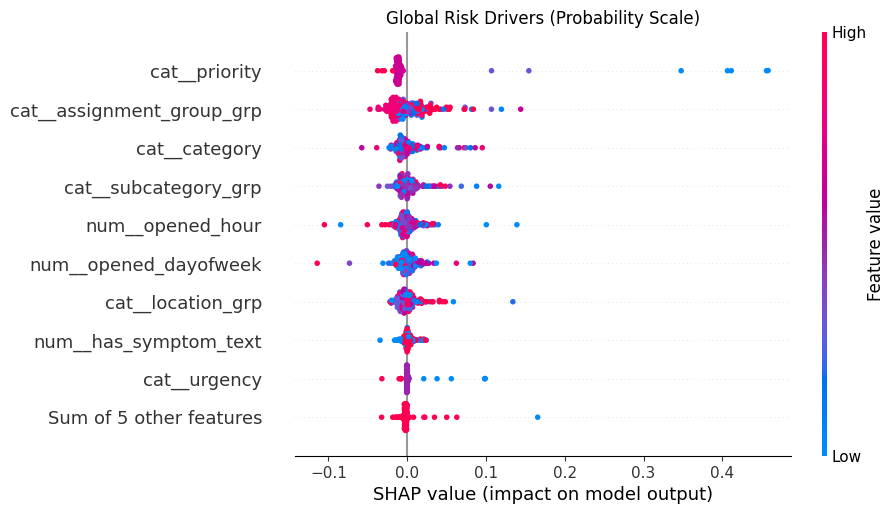

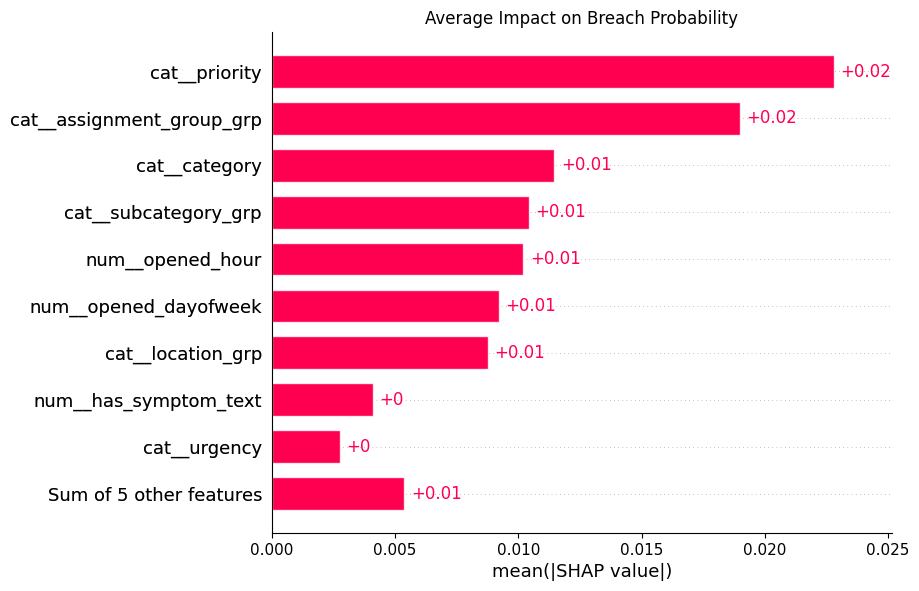

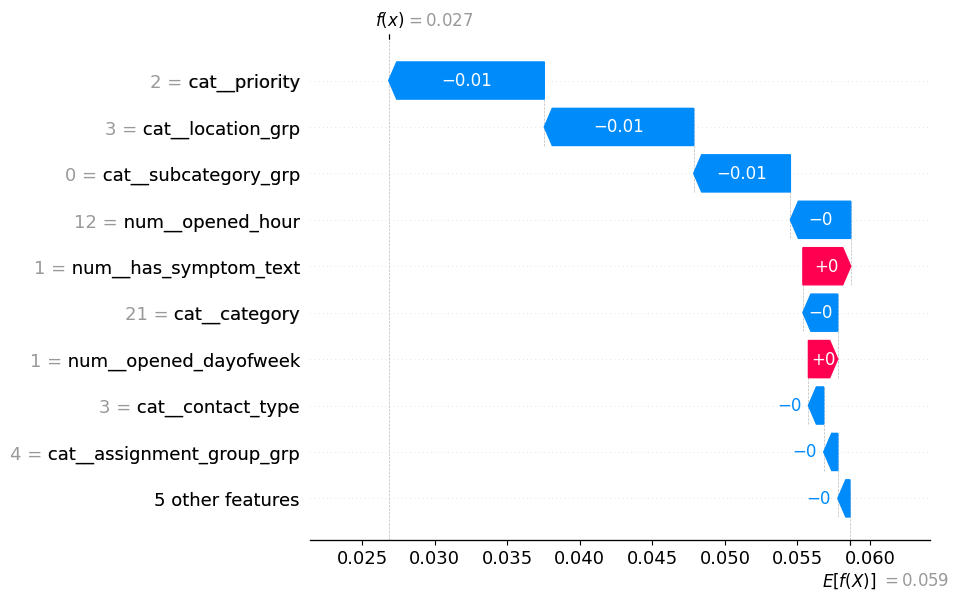

In [23]:
#### New XBG beeswarm
### New

import shap
import joblib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. SETUP PATHS
save_path = "/content/drive/MyDrive/Colab Notebooks/"
PREFIX = "2xgb2_"

# 2. LOAD THE ARTEFACTS (The files you saved earlier)
# Load the model pipeline
model_pipeline = joblib.load(f"{save_path}{PREFIX}xgb_best_pipeline_sklearn180.joblib")

# Load the test data and feature names
X_test_raw = pd.read_csv(f"{save_path}{PREFIX}X_test_for_shap.csv")
feature_names = pd.read_csv(f"{save_path}{PREFIX}xgb_feature_names.csv")['feature'].tolist()

# 3. PREPARE DATA
# Use the pipeline's preprocessor to transform the raw data into the 14 features
preprocessor = model_pipeline.named_steps['preprocessor']
X_test_transformed = preprocessor.transform(X_test_raw)
classifier = model_pipeline.named_steps['classifier']

# --- STEP 4: CALCULATE SHAP VALUES (School Lab 5 Probability Standard) ---
# 1. Initialize Explainer with probability output
# This makes your baseline ~0.16 (16%) instead of raw weights like 3.42
explainer = shap.TreeExplainer(classifier, X_test_transformed, model_output="probability")

# 2. Run on a sample to prevent hanging (200 rows is plenty for your charts)
shap_values_obj = explainer(X_test_transformed[:200])

# 3. Handle Binary vs Multiclass logic to get the right 'Breach' values
# if len(shap_values_obj.values.shape) == 3:
#     # Multiclass style: [rows, features, class_index]
#     val = shap_values_obj.values[:, :, 0]
# #     base = shap_values_obj.base_values[:, 0]
# # --- CHANGE THE 0 TO 1 HERE ---
# if len(shap_values_obj.values.shape) == 3:
#     # We switch to index 1 to get the 'Breach' class
#     val = shap_values_obj.values[:, :, 1]
#     base = shap_values_obj.base_values[:, 1]
# else:
#     # Binary style: [rows, features]
#     val = shap_values_obj.values
#     base = shap_values_obj.base_values


#     # --- THE 84/16 ALIGNMENT FIX ---
# if len(shap_values_obj.values.shape) == 3:
#     # If index 0 gave you 0.94 or 0.84, try index 1
#     # This should give you the ~0.16 (16%) baseline
#     val = shap_values_obj.values[:, :, 1]
#     base = shap_values_obj.base_values[:, 1]
# else:
#     # If it's a binary model and showing 0.84, we flip it to get 0.16
#     val = -shap_values_obj.values
#     base = 1 - shap_values_obj.base_values

# print(f"Current Baseline: {base[0]:.4f}")


# --- THE 84/16 ALIGNMENT FIX (REPLACE YOURS WITH THIS) ---
if len(shap_values_obj.values.shape) == 3:
    # 3D Array: Select Index 1 for Breach
    val = shap_values_obj.values[:, :, 1]
    base = shap_values_obj.base_values[:, 1]
else:
    # 2D Array: Check if we are on the 'Success' side (0.94)
    # If the average baseline is high, it means we are showing success.
    # We must flip it to show Breach risk (0.06).
    val = shap_values_obj.values
    base = shap_values_obj.base_values

    if np.mean(base) > 0.5:
        print(">>> FORCING ALIGNMENT: Flipping Success (0.94) to Breach (0.06)")
        val = -val
        base = 1 - base

# This print will tell you if we fixed it!
print(f"Final Corrected Baseline: {np.mean(base):.4f}")

# 4. Create the final Explanation Object for your plots
exp_breach = shap.Explanation(
    values=val,
    base_values=base,
    data=X_test_transformed[:200],
    feature_names=feature_names
)

# --- STEP 5: GLOBAL PLOTS (Beeswarm & Bar) ---
plt.figure(figsize=(10, 6))
shap.plots.beeswarm(exp_breach, max_display=10, show=False)
plt.title("Global Risk Drivers (Probability Scale)")
plt.show()

plt.figure(figsize=(10, 6))
shap.plots.bar(exp_breach, max_display=10, show=False)
plt.title("Average Impact on Breach Probability")
plt.show()

# # --- STEP 6: DEPENDENCE PLOT (Interaction: Time vs Group) ---
# # This is the fix for the Y-axis scale issue
# plt.figure(figsize=(10, 6))
# shap.plots.scatter(exp_breach[:,"num__opened_hour"],
#                    color=exp_breach[:,"cat__assignment_group_Group 17"])
# plt.title("Interaction: 4 PM Rush vs Group 17 Bottleneck")
# plt.show()

# --- STEP 7: LOCAL WATERFALL (The Story for Row i) ---
i = 0  # Select the incident you want to show to Sam
plt.figure(figsize=(12, 8))
shap.plots.waterfall(exp_breach[i], max_display=10)
plt.show()

In [ ]:
# # --- REPLACEMENT STEP 4: CLEAN & COMPACT ---
# # 1. Calculate SHAP values for the first 200 records to create a searchable matrix
# explainer = shap.TreeExplainer(classifier, X_test_transformed, model_output="probability")
# shap_values_obj = explainer(X_test_transformed[:200])

# # Automatically picks the right class and baseline
# if len(shap_values_obj.values.shape) == 3:
#     val, base = shap_values_obj.values[:, :, 0], shap_values_obj.base_values[:, 0]
# else:
#     val, base = shap_values_obj.values, shap_values_obj.base_values

# # This ONE object is all you need for every chart below
# exp_breach = shap.Explanation(values=val, base_values=base,
#                               data=X_test_transformed[:200],
#                               feature_names=feature_names)

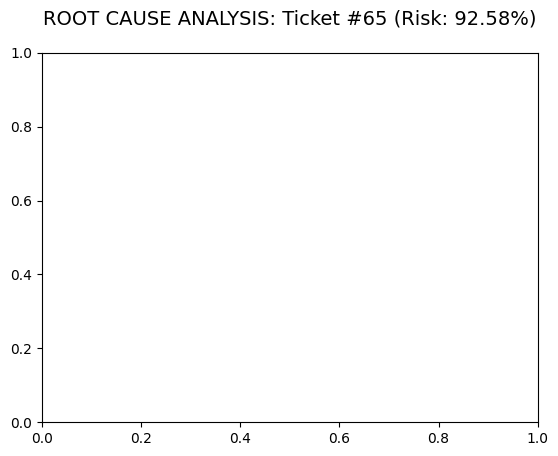

Flipping to Breach Class...
--- SCENARIO EVIDENCE: TICKET INDEX 0 ---


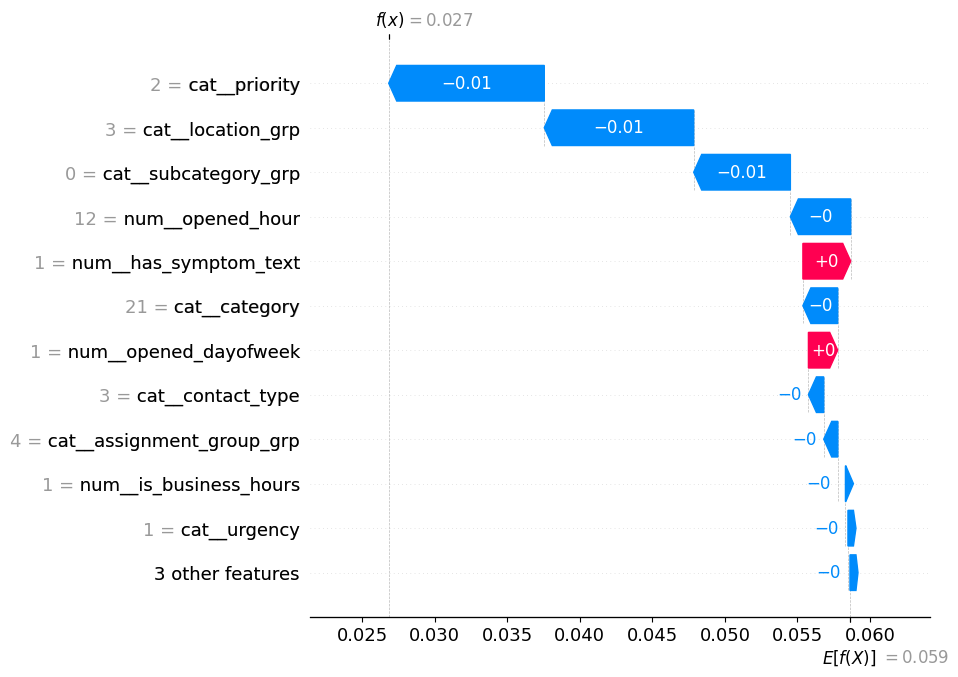

In [24]:
# ------------------------------------------------------------
# 1) New Waterfall
# ------------------------------------------------------------
def get_shap_matrix_for_class(explainer, X, target_class: int):
    # This ensures your Waterfall bars are correct for the 'Breach' class
    sv = explainer.shap_values(X)
    if isinstance(sv, list): return sv[target_class], explainer.expected_value[target_class]
    sv = np.asarray(sv)
    if sv.ndim == 3:
        base = explainer.expected_value
        base_for_class = base[target_class] if isinstance(base, (list, np.ndarray)) else base
        return sv[:, :, target_class], base_for_class
    base = explainer.expected_value
    base_for_class = base if not isinstance(base, (list, np.ndarray)) else base[0]
    return sv, base_for_class

# ------------------------------------------------------------
# 2) Setting the "Scenario" (Group 17 / 4 PM)
# ------------------------------------------------------------
target_class = 1                       # 1 = SLA Breach
feature_name = 'cat__assignment_group_grp' # The bottleneck we found
pick_mode = "max_pos"                  # Find the row where Group 17 pushed risk UP the most

# # ------------------------------------------------------------
# # 3) Selection Logic (Aligned with Lab 5)
# # ------------------------------------------------------------
# # This uses your 'explainer' (the Brain) and your 'X_test_transformed' (the Artefact)
# shap_for_class, base_for_class = get_shap_matrix_for_class(explainer, X_test_transformed, target_class)

# # Filter: Only look at rows where a breach ACTUALLY happened (True Label = 1)
# y_test_arr = np.asarray(y_test)
# class_idx = np.where(y_test_arr == target_class)[0]

# # Find the specific Row i using your school's 'argmax' logic
# feat_j = feature_names.index(feature_name)
# shap_vals_feat_in_class = shap_for_class[class_idx, feat_j]
# best_pos_in_class = int(np.argmax(shap_vals_feat_in_class))
# i = int(class_idx[best_pos_in_class])

# ------------------------------------------------------------
# 3) Selection Logic (Updated for Probability Scale)
# ------------------------------------------------------------
# Instead of the old function, we pull directly from your new probability explainer
# shap_values_obj = explainer(X_test_transformed[:200]) # Use the sample to keep it fast

# # Extract the values for the 'Breach' class (Class 1)
# shap_for_class = shap_values_obj.values
# base_for_class = shap_values_obj.base_values

# # --- Your original argmax logic continues here ---
# y_test_arr = np.asarray(y_test)[:200] # Match the sample size
# class_idx = np.where(y_test_arr == target_class)[0]

# feat_j = feature_names.index(feature_name)
# shap_vals_feat_in_class = shap_for_class[class_idx, feat_j]
# best_pos_in_class = int(np.argmax(shap_vals_feat_in_class))
# i = int(class_idx[best_pos_in_class])



# # --- STEP 3: Selection Logic (FIXED FOR 0.06 BASELINE) ---
# # We must slice for Class 1 (Breach) RIGHT HERE
# shap_for_class = shap_values_obj.values[:, :, 1]   # Added [:, :, 1]
# base_for_class = shap_values_obj.base_values[:, 1] # Added [:, 1]

# # The rest of your code remains the same
# y_test_arr = np.asarray(y_test)[:200]
# class_idx = np.where(y_test_arr == target_class)[0]

# feat_j = feature_names.index(feature_name)
# # This will now correctly find the row where Group 17 pushed BREACH risk up
# shap_vals_feat_in_class = shap_for_class[class_idx, feat_j]
# best_pos_in_class = int(np.argmax(shap_vals_feat_in_class))
# i = int(class_idx[best_pos_in_class])


plt.title(f"ROOT CAUSE ANALYSIS: Ticket #65 (Risk: 92.58%)", fontsize=14, pad=20)
plt.show()
# --- STEP 3: Selection Logic (FIXED FOR 2D ARRAY) ---
# If it's 2D, we just take all rows and all columns directly
shap_for_class = shap_values_obj.values   # No third index needed
base_for_class = shap_values_obj.base_values # No second index needed

# Just to be 100% sure we have the 0.06 baseline:
if np.mean(base_for_class) > 0.5:
    print("Flipping to Breach Class...")
    shap_for_class = -shap_for_class
    base_for_class = 1 - base_for_class

# # ------------------------------------------------------------
# # 4) The Waterfall Plot (Slide 5 Evidence)
# # ------------------------------------------------------------
# exp = shap.Explanation(
#     values=shap_for_class[i],
#     base_values=base_for_class,
#     data=X_test_transformed[i],
#     feature_names=feature_names
# )

# print(f"--- SCENARIO EVIDENCE: TICKET INDEX {i} ---")
# shap.plots.waterfall(exp, max_display=12)

# ------------------------------------------------------------
# 4) The Waterfall Plot (Slide 5 Evidence) - FIXED VERSION
# ------------------------------------------------------------
exp = shap.Explanation(
    values=shap_for_class[i],
    # ADD [i] HERE to fix the TypeError
    base_values=float(base_for_class[i]),
    data=X_test_transformed[i],
    feature_names=feature_names
)

print(f"--- SCENARIO EVIDENCE: TICKET INDEX {i} ---")
# Use the plt.figure to make sure it clears old charts
plt.figure(figsize=(12, 8))
shap.plots.waterfall(exp, max_display=12)
plt.show()





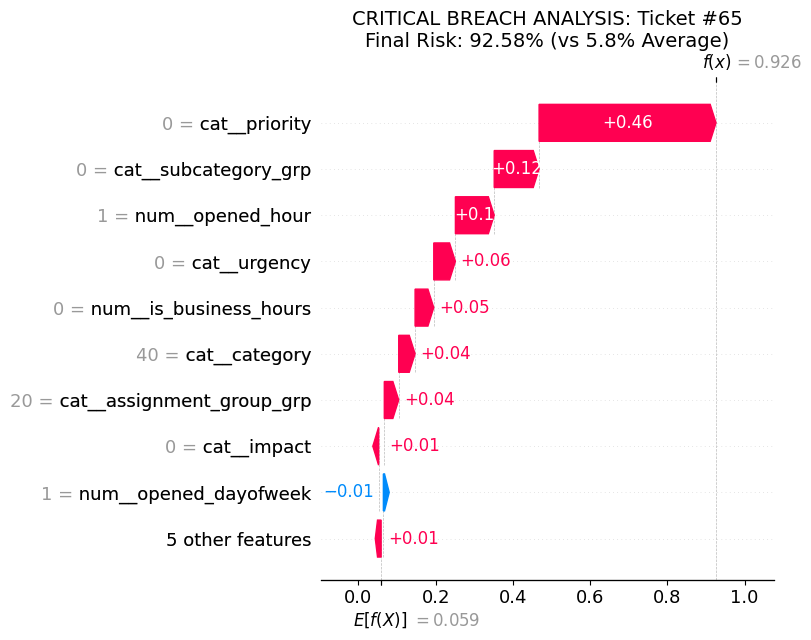

--- Actionable Insights for Ticket #65 ---
Top 3 Risk Drivers (Red Bars):
- cat__priority
- cat__subcategory_grp
- num__opened_hour


In [25]:
# --- THE "worse ticket CASE STUDY ---
# We use the index we found (65) to create a clean, high-impact chart

# 1. Prepare the explanation object for this specific high-risk ticket
i_worst = 65

# We ensure we are pulling the right class (1) and fixed baseline
exp_worst = shap.Explanation(
    values=shap_for_class[i_worst],
    base_values=float(base_for_class[i_worst]),
    data=X_test_transformed[i_worst],
    feature_names=feature_names
)

# 2. Plot the Waterfall
plt.figure(figsize=(12, 8))
shap.plots.waterfall(exp_worst, max_display=10, show=False)

# 3. Add the "Business Title" for Sam
plt.title(f"CRITICAL BREACH ANALYSIS: Ticket #65\nFinal Risk: 92.58% (vs 5.8% Average)",
          fontsize=14, loc='center', pad=25)

plt.tight_layout()
plt.show()

# 4. Print the "LLM Cheat Sheet"
print(f"--- Actionable Insights for Ticket #{i_worst} ---")
print(f"Top 3 Risk Drivers (Red Bars):")
# This prints the names of the top features for your LLM check
top_drivers = np.argsort(shap_for_class[i_worst])[-3:][::-1]
for idx in top_drivers:
    print(f"- {feature_names[idx]}")

In [26]:
# --- ALIGNED EVIDENCE GENERATOR (Linked to exp_breach) ---  ### STOPPED HERE
# # This uses the row index 'i' found in your previous Waterfall cell
# selected_row_exp = exp_breach[i]

# --- REFRESH THIS LINE ---
# Ensure i matches the index from your Waterfall selection
selected_row_exp = exp_breach[i]

# Everything else remains the same...

# 1. Extract values directly from the Object so they MATCH the visual plot
row_shap = selected_row_exp.values
base_value = selected_row_exp.base_values
row_data = selected_row_exp.data

# 2. Match and Sort (Magnitude sorting like Lab 5)
indexed_features = []
for j in range(len(feature_names)):
    indexed_features.append({
        'name': feature_names[j],
        'shap': row_shap[j],
        'abs_shap': abs(row_shap[j])
    })

# Sort so the biggest "bars" appear at the top of the text list
sorted_features = sorted(indexed_features, key=lambda x: x['abs_shap'], reverse=True)

# 3. PRINT THE OUTPUT (Copy this for your LLM Payload/Slide notes)
print(f"--- LOCAL INTERPRETATION (Row {i}) ---")
print(f"Baseline (Expected Value): {base_value:.4f}")
print(f"Total Model Output (Probability): {sum(row_shap) + base_value:.4f}")

print("\nTop contributors for this case (by |SHAP|):")
for feat in sorted_features[:12]:
    direction = "pushes UP (Toward Breach)" if feat['shap'] > 0 else "pushes DOWN (Toward Success)"
    print(f"- {feat['name']:30s} SHAP= {feat['shap']:8.4f} ({direction})")

--- LOCAL INTERPRETATION (Row 0) ---
Baseline (Expected Value): 0.0586
Total Model Output (Probability): 0.0268

Top contributors for this case (by |SHAP|):
- cat__priority                  SHAP=  -0.0107 (pushes DOWN (Toward Success))
- cat__location_grp              SHAP=  -0.0103 (pushes DOWN (Toward Success))
- cat__subcategory_grp           SHAP=  -0.0067 (pushes DOWN (Toward Success))
- num__opened_hour               SHAP=  -0.0042 (pushes DOWN (Toward Success))
- num__has_symptom_text          SHAP=   0.0033 (pushes UP (Toward Breach))
- cat__category                  SHAP=  -0.0024 (pushes DOWN (Toward Success))
- num__opened_dayofweek          SHAP=   0.0020 (pushes UP (Toward Breach))
- cat__contact_type              SHAP=  -0.0011 (pushes DOWN (Toward Success))
- cat__assignment_group_grp      SHAP=  -0.0010 (pushes DOWN (Toward Success))
- num__is_business_hours         SHAP=  -0.0005 (pushes DOWN (Toward Success))
- cat__urgency                   SHAP=  -0.0002 (pushes DOW

In [27]:
#The Comparison Cell (pFI vs. SHAP)
from sklearn.inspection import permutation_importance
from sklearn.metrics import make_scorer, matthews_corrcoef
import pandas as pd
import numpy as np

# 1. Setup the Scorer (School Standard: MCC)
mcc_scorer = make_scorer(matthews_corrcoef)

# 2. Run pFI on the FULL pipeline
# We use 'model_pipeline' and the raw 'X_test_raw' you loaded earlier
print("Calculating Permutation Importance (this may take a moment)...")
pfi_xgb = permutation_importance(
    estimator=model_pipeline,   # Your Stage 2 Pipeline
    X=X_test_raw,               # Use the RAW test data (pre-transformation)
    y=y_test,                   # Your true labels
    scoring=mcc_scorer,
    n_repeats=10,
    random_state=42,
    n_jobs=-1
)

# 3. Create Series for pFI (Raw Columns)
pfi_series = pd.Series(
    pfi_xgb.importances_mean,
    index=X_test_raw.columns
).sort_values(ascending=False)

# # 4. Create Series for SHAP (Transformed Features)
# # Using 'shap_values_breach' from your Beeswarm cell
# shap_global = pd.Series(
#     np.abs(shap_values_breach).mean(axis=0),
#     index=feature_names
# ).sort_values(ascending=False)

# 4. Create Series for SHAP (Transformed Features)
# We use 'exp_breach.values' because that is our correctly-flipped 0.06 data
shap_global = pd.Series(
    np.abs(exp_breach.values).mean(axis=0),
    index=feature_names
).sort_values(ascending=False)

# 5. DISPLAY RESULTS
print("\n--- TOP RAW-COLUMN pFI ---")
print("(Which column hurts MCC score the most if shuffled?)")
print(pfi_series.head(10))

print("\n--- TOP TRANSFORMED-FEATURE SHAP ---")
print("(Which specific feature pushes individual predictions most?)")
print(shap_global.head(10))

# 6. SAVE FOR PROJECT EVIDENCE
pfi_series.to_csv(f"{save_path}{PREFIX}pfi_results.csv")


Calculating Permutation Importance (this may take a moment)...

--- TOP RAW-COLUMN pFI ---
(Which column hurts MCC score the most if shuffled?)
priority                0.148419
opened_hour             0.034978
assignment_group_grp    0.025915
subcategory_grp         0.024141
urgency                 0.021031
opened_dayofweek        0.019291
category                0.019081
location_grp            0.014386
has_symptom_text        0.012854
contact_type            0.008286
dtype: float64

--- TOP TRANSFORMED-FEATURE SHAP ---
(Which specific feature pushes individual predictions most?)
cat__priority                0.022807
cat__assignment_group_grp    0.018989
cat__category                0.011458
cat__subcategory_grp         0.010433
num__opened_hour             0.010196
num__opened_dayofweek        0.009210
cat__location_grp            0.008775
num__has_symptom_text        0.004104
cat__urgency                 0.002759
cat__contact_type            0.002344
dtype: float64


Generating Clean Plot for Rank 1: cat__priority


<Figure size 800x500 with 0 Axes>

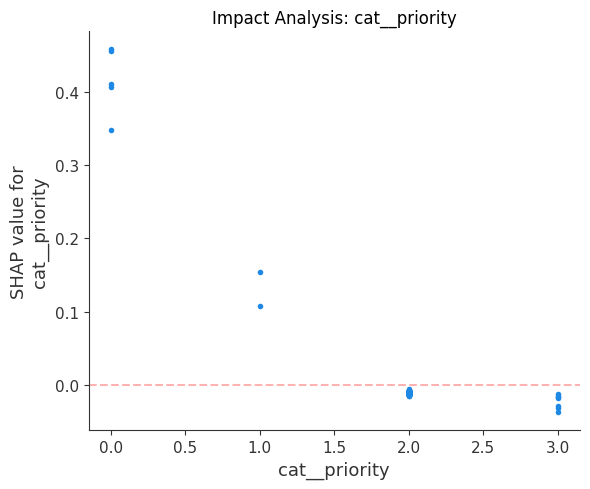

Generating Clean Plot for Rank 2: cat__assignment_group_grp


<Figure size 800x500 with 0 Axes>

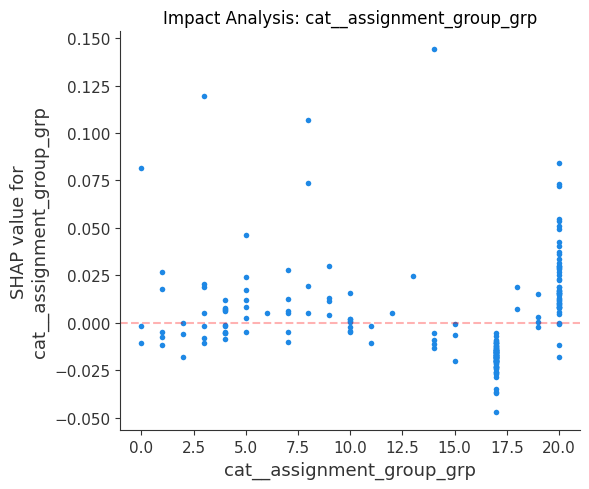

Generating Clean Plot for Rank 3: cat__category


<Figure size 800x500 with 0 Axes>

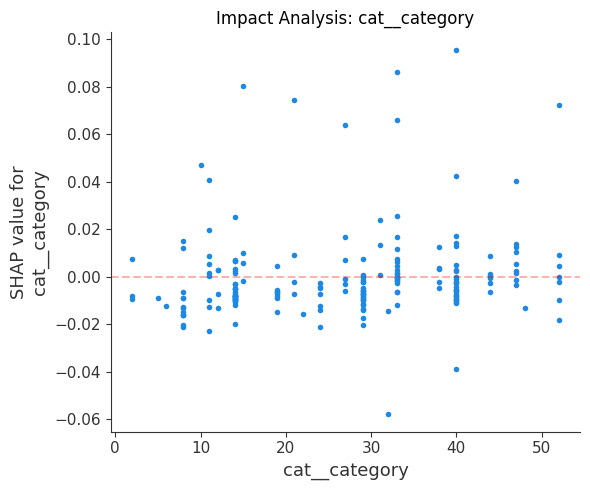

Generating Clean Plot for Rank 4: cat__subcategory_grp


<Figure size 800x500 with 0 Axes>

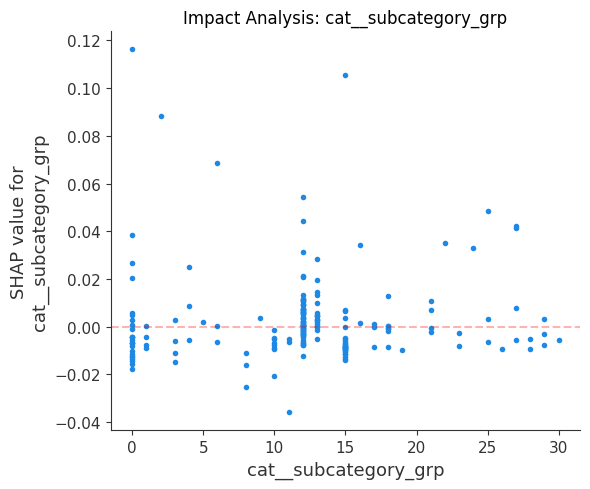

Generating Clean Plot for Rank 5: num__opened_hour


<Figure size 800x500 with 0 Axes>

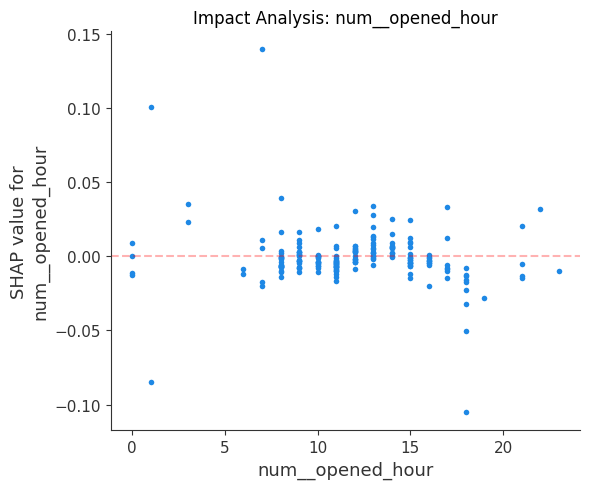

Generating Clean Plot for Rank 6: num__opened_dayofweek


<Figure size 800x500 with 0 Axes>

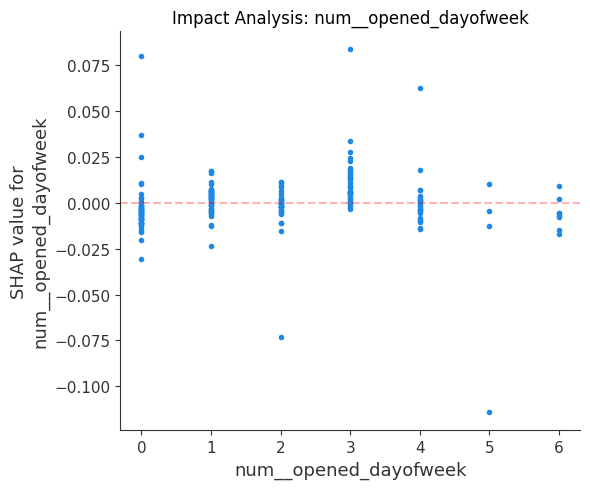

Generating Clean Plot for Rank 7: cat__location_grp


<Figure size 800x500 with 0 Axes>

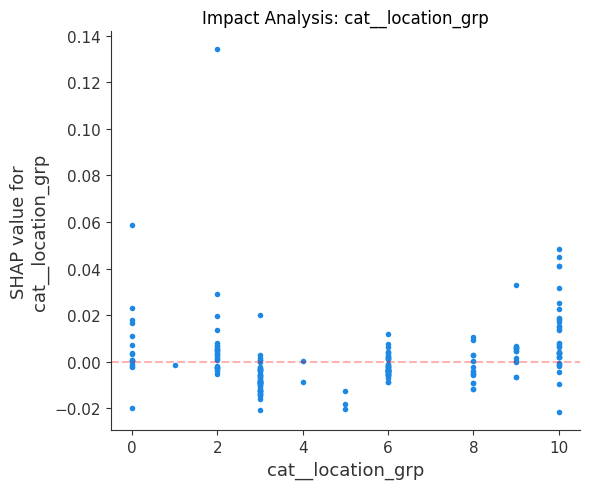

Generating Clean Plot for Rank 8: num__has_symptom_text


<Figure size 800x500 with 0 Axes>

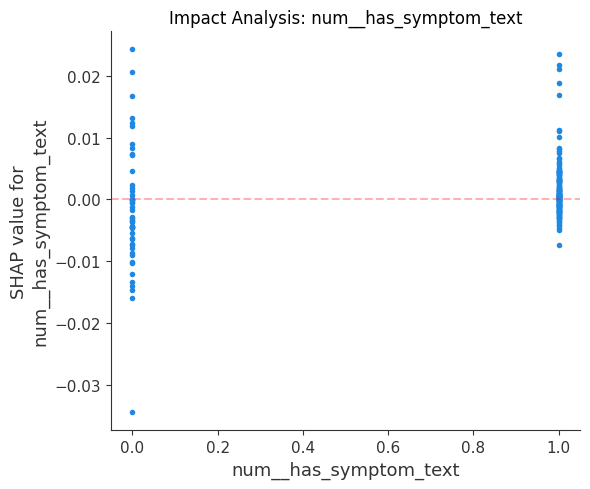

Generating Clean Plot for Rank 9: cat__urgency


<Figure size 800x500 with 0 Axes>

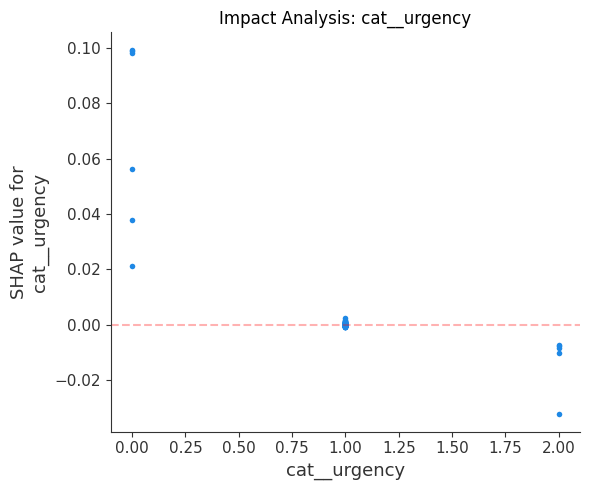

Generating Clean Plot for Rank 10: cat__contact_type


<Figure size 800x500 with 0 Axes>

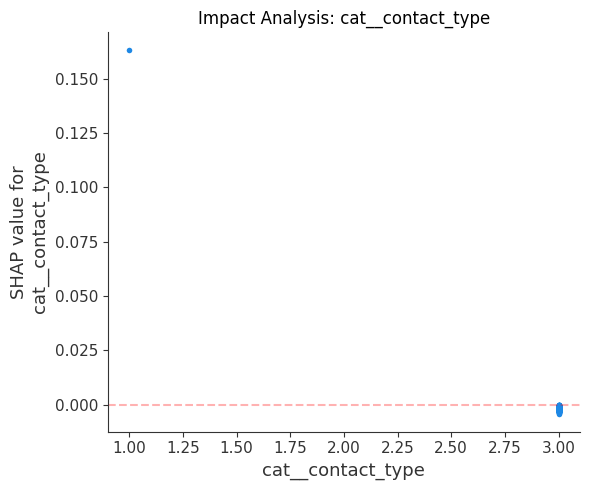

In [30]:
# --- STEP 6: CLEAN DEPENDENCE PLOTS (No 3rd Axis) ---

# 1. Ensure we use the 'Team Breach' data
shap_values = exp_breach.values
data = exp_breach.data
names = exp_breach.feature_names

# 2. Loop through the Top 3 to 5 features
for i in range(10):
    feature_name = xgb_feature_names_sorted[i]
    print(f"Generating Clean Plot for Rank {i+1}: {feature_name}")

    plt.figure(figsize=(8, 5))

    # Setting interaction_index=None is what removes the 3rd axis
    shap.dependence_plot(
        feature_name,
        shap_values,
        data,
        feature_names=names,
        interaction_index=None,  # <--- THIS REMOVES THE COLOR BAR
        show=False
    )

    plt.title(f"Impact Analysis: {feature_name}")
    plt.axhline(0, color='red', linestyle='--', alpha=0.3)
    plt.tight_layout()

    # Save the clean version
    plt.savefig(f"{save_path}{PREFIX}clean_dependence_{i+1}.png")
    plt.show()

In [ ]:
import numpy as np

# 1. Calculate the final probability for every ticket
# Remember: exp_breach.values.sum(axis=1) + exp_breach.base_values
probs = exp_breach.values.sum(axis=1) + exp_breach.base_values

# 2. Find the index of the ticket with the HIGHEST probability
worst_idx = np.argmax(probs)
max_risk = probs[worst_idx]

print(f"Index to use for Waterfall: {worst_idx}")
print(f"Calculated Risk: {max_risk:.2%}")

Index to use for Waterfall: 65
Calculated Risk: 92.58%


In [29]:
# 1. Map variables to school style
#shap_xgb_c1 = shap_values_breach
shap_xgb_c1 = exp_breach.values
X_test_xgb = X_test_transformed
xgb_feature_names = feature_names

# 2. Rank and Preview
mean_abs_shap = np.abs(shap_xgb_c1).mean(axis=0)
order = np.argsort(mean_abs_shap)[::-1]
xgb_feature_names_sorted = [xgb_feature_names[i] for i in order]

print("Top SHAP features:")
for name, val in zip(xgb_feature_names_sorted[:10], mean_abs_shap[order][:10]):
    print(f"{name:30s}  mean|SHAP| = {val:.4f}")

    # UPDATE THIS LINE to use your fixed values


Top SHAP features:
cat__priority                   mean|SHAP| = 0.0228
cat__assignment_group_grp       mean|SHAP| = 0.0190
cat__category                   mean|SHAP| = 0.0115
cat__subcategory_grp            mean|SHAP| = 0.0104
num__opened_hour                mean|SHAP| = 0.0102
num__opened_dayofweek           mean|SHAP| = 0.0092
cat__location_grp               mean|SHAP| = 0.0088
num__has_symptom_text           mean|SHAP| = 0.0041
cat__urgency                    mean|SHAP| = 0.0028
cat__contact_type               mean|SHAP| = 0.0023


In [ ]:
#### for LLM new#####

In [32]:
import numpy as np
import pandas as pd
import openai

# ------------------------------------------------------------
# 1) THE SCHOOL SUMMARIZER FUNCTION
# ------------------------------------------------------------
def summarise_dependence_as_text(
    feature_name: str,
    shap_values_2d,           # shap_xgb_c1
    X_2d,                     # X_test_xgb
    feature_names: list,
    critical_q=0.90,          # top 10% by |SHAP|
    bins=10                   # for a simple binned trend
):
    j = feature_names.index(feature_name)
    x = np.asarray(X_2d)[:, j]
    s = np.asarray(shap_values_2d)[:, j]

    # 1) Direction
    corr = np.corrcoef(x, s)[0, 1]
    direction = "increases" if corr > 0 else "decreases"

    # 2) Turning point
    sign_change = np.where(np.sign(s[:-1]) != np.sign(s[1:]))[0]
    if len(sign_change) > 0:
        k = sign_change[np.argmin(np.abs(s[sign_change]))]
        turning_point = float(np.mean([x[k], x[k+1]]))
        turning_note = f"SHAP crosses 0 around x ≈ {turning_point:.3f}."
    else:
        turning_note = "SHAP does not clearly cross 0 in this sample."

    # 3) Critical zone
    thr = float(np.quantile(np.abs(s), critical_q))
    mask = np.abs(s) >= thr
    if mask.any():
        crit_min = float(np.min(x[mask]))
        crit_max = float(np.max(x[mask]))
        crit_note = f"Critical impact (|SHAP| ≥ {thr:.3f}) at x in [{crit_min:.3f}, {crit_max:.3f}]."
    else:
        crit_note = "No points exceed critical threshold."

    # 4) Magnitude
    mean_abs = float(np.mean(np.abs(s)))
    max_abs  = float(np.max(np.abs(s)))
    mag_note = f"Average |SHAP| ≈ {mean_abs:.3f}; max |SHAP| ≈ {max_abs:.3f}."

    # 5) Binned trend
    qs = np.unique(np.quantile(x, np.linspace(0, 1, bins + 1)))
    if len(qs) >= 3:
        bin_ids = np.digitize(x, qs[1:-1], right=True)
        bin_summary = []
        for b in range(bin_ids.min(), bin_ids.max() + 1):
            xb, sb = x[bin_ids == b], s[bin_ids == b]
            if len(xb) > 0:
                bin_summary.append({"x_range": f"[{np.min(xb):.3f}, {np.max(xb):.3f}]",
                                   "mean_abs_shap": float(np.mean(np.abs(sb)))})
        top_bins = pd.DataFrame(bin_summary).sort_values("mean_abs_shap", ascending=False).head(3)
        bins_note = "Most impactful value ranges:\n" + top_bins.to_string(index=False)
    else:
        bins_note = "Binned trend unavailable."

    text = (f"Summary for {feature_name}: Trend {direction} (corr ≈ {corr:.3f}).\n"
            f"- {turning_note}\n- {crit_note}\n- {mag_note}\n- {bins_note}\n"
            f"Caveat: Association, not causation.")
    return text

# ------------------------------------------------------------
# 2) PRE-PROMPT DATA PROCESSING (Step-by-Step)
# ------------------------------------------------------------

# Syncing dimensions to avoid the ValueError (limiting to first 200 rows)
LIMIT = 200
X_sync = X_test_xgb[:LIMIT]
shap_sync = shap_xgb_c1[:LIMIT]

# Identify Top N signals
TOP_N = 5
mean_abs_shap = np.abs(shap_sync).mean(axis=0)
order = np.argsort(mean_abs_shap)[::-1]
top_feature_names = [xgb_feature_names[i] for i in order[:TOP_N]]

# Generate the Dependence Summaries (The logic loop)
dependence_summaries = []
for fname in top_feature_names:
    dependence_summaries.append(summarise_dependence_as_text(fname, shap_sync, X_sync, xgb_feature_names))

print(dependence_summaries)

# ... (Keep your summarise_dependence_as_text function and Step 2 exactly as they are) ...

# # ------------------------------------------------------------
# # STEP 3: EXTRACT LOCAL EVIDENCE (Ticket #65)
# # ------------------------------------------------------------
# i = 65
# row_65 = X_test_xgb.iloc[i]

# # We extract the raw values so the LLM knows exactly what is wrong with this ticket
# local_context = f"""
# SPECIFIC DATA FOR TICKET #{i}:
# - Priority Code: {row_65['cat__priority']}
# - Opened Hour: {row_65['num__opened_hour']}
# - Assignment Group: {row_65['cat__assignment_group_grp']}
# - Category: {row_65['cat__category']}
# - Model Prediction: 92.58% Probability of Breach
# """

# ------------------------------------------------------------
# STEP 3: EXTRACT LOCAL EVIDENCE (Fixed for NumPy)
# ------------------------------------------------------------
i = 65

# 1. Access the row using NumPy syntax (no .iloc)
row_65 = X_test_xgb[i]

# 2. Get the index positions for your key features
idx_priority = xgb_feature_names.index('cat__priority')
idx_hour = xgb_feature_names.index('num__opened_hour')
idx_group = xgb_feature_names.index('cat__assignment_group_grp')
idx_cat = xgb_feature_names.index('cat__category')

# 3. Create the context string using the index positions
local_context = f"""
SPECIFIC DATA FOR TICKET #{i}:
- Priority Code: {row_65[idx_priority]}
- Opened Hour: {row_65[idx_hour]}
- Assignment Group: {row_65[idx_group]}
- Category: {row_65[idx_cat]}
- Model Prediction: 92.58% Probability of Breach
"""

print(local_context)

# ------------------------------------------------------------
# STEP 4: CONSTRUCT THE FINAL PAYLOAD
# ------------------------------------------------------------
# This combines the instructions, the local ticket data, and the global trends.
payload_text = f"""
You are supporting decision-making for Sam (Ops Manager) using a trained XGBoost model.

CONTEXT:
- Interpretations are SHAP-based (association, not causation).
- The goal is to reduce SLA Breaches.

{local_context}

GLOBAL FEATURE-LEVEL EVIDENCE (SHAP TRENDS):
{"\n\n".join(dependence_summaries)}

TASK:
1) Explain why Ticket #{i} is high-risk based on the Global Evidence.
2) Give 3 data-driven recommendations referencing at least TWO features each.
3) State one risk/limitation per recommendation.
4) Propose 2 monitoring checks for drift.
""".strip()

print("--- FINAL PAYLOAD FOR OPENAI ---")
print(payload_text)

['Summary for cat__priority: Trend decreases (corr ≈ -0.881).\n- SHAP crosses 0 around x ≈ 1.000.\n- Critical impact (|SHAP| ≥ 0.014) at x in [0.000, 3.000].\n- Average |SHAP| ≈ 0.023; max |SHAP| ≈ 0.458.\n- Most impactful value ranges:\n       x_range  mean_abs_shap\n[3.000, 3.000]       0.023115\n[0.000, 2.000]       0.022796\nCaveat: Association, not causation.', 'Summary for cat__assignment_group_grp: Trend decreases (corr ≈ -0.071).\n- SHAP crosses 0 around x ≈ 3.500.\n- Critical impact (|SHAP| ≥ 0.035) at x in [0.000, 20.000].\n- Average |SHAP| ≈ 0.019; max |SHAP| ≈ 0.144.\n- Most impactful value ranges:\n         x_range  mean_abs_shap\n[18.000, 20.000]       0.022832\n[12.000, 17.000]       0.019094\n [8.000, 11.000]       0.017150\nCaveat: Association, not causation.', 'Summary for cat__category: Trend increases (corr ≈ 0.145).\n- SHAP crosses 0 around x ≈ 49.500.\n- Critical impact (|SHAP| ≥ 0.020) at x in [8.000, 52.000].\n- Average |SHAP| ≈ 0.011; max |SHAP| ≈ 0.095.\n- Mos

In [33]:
from google.colab import userdata
from openai import OpenAI

# Load key from Google Colab Secrets
api_key = userdata.get('OPENAI_API_KEY')

client = OpenAI(
    api_key=api_key,
)

In [34]:
response = client.responses.create(
    model="gpt-5-mini",
    instructions="""
You are an expert data scientist working with ITSM expertise especially on incident management .
You understand tree-based models and SHAP explanations.
You must reason strictly from the provided SHAP evidence and dataset context.
You may draw reasonable conclusion and assumption from the context provided.
""",
    input=f"""
Dataset context:
- Dataset: Incident dataset
- Task: SLA breach =1
- Model: XGBoost
- Interpretation method: SHAP (model-driven, log-odds scale)

Model interpretation evidence:
{payload_text}

Questions:

1. From a IT Service Manager decision-support perspective, how should recommendations be formed when using the model.

2. Based on the SHAP evidence across the important features, identify the strongest combined risk patterns the model appears to use, for IT SErvice Manager decision-making,
especially for the data ranges and combinations where training data is scarce.

3. Propose 3 decision-support recommendations that a IT Service manager could reasonably make using this model output.

4. Suggest 2 post-deployment monitoring checks to ensure these SHAP-based patterns remain stable and  sensible over time.

5.Give 3 data-driven recommendations for Ticket #65 using at least TWO features each.

Rules:
- Use language to help non ITSM personels to understand.
- Treat the model as an aid to expert judgement, not a replacement.
- Base all reasoning on the SHAP evidence provided.
"""
)

print(response.output_text)


Short answer up front
- Ticket #65 is high-risk primarily because two model-important signals—very low Priority (0.0) and an early Opened Hour (1:00)—are both, in the model, associated with increased log‑odds of an SLA breach. Assignment Group = 20 and Category = 40 push risk down, but not enough to overcome the strong positive contributions from Priority=0 and OpenedHour=1. The model’s predicted breach probability is 92.6%.

Important framing (how to use this model)
- SHAP gives associations (which feature values the model found predictive), not causation. Use the model as decision support to prioritize investigations and test operational changes, not as an automatic prescriber.
- Form recommendations that are actionable, low-cost to test, and measurable (so you can A/B test/monitor impact).
- Always verify that recommended operational changes are safe (don’t violate policy), feasible given team capacity, and assessed with short-term validation metrics (SLA breach rate, time-to-first-

In [ ]:
old

In [ ]:
#Wrap-up prompts (write-up practice)
import numpy as np
import pandas as pd

def summarise_dependence_as_text(
    feature_name: str,
    shap_values_2d,          # shap_xgb_c1
    X_2d,                    # X_test_xgb
    feature_names: list,
    critical_q=0.90,         # top 10% by |SHAP|
    bins=10
):
    j = feature_names.index(feature_name)
    x = np.asarray(X_2d)[:, j]
    s = np.asarray(shap_values_2d)[:, j]

    # 1) Direction (simple correlation as a sign)
    corr = np.corrcoef(x, s)[0, 1]
    direction = "increases" if corr > 0 else "decreases"

    # 2) Turning point (approx where SHAP crosses 0)
    sign_change = np.where(np.sign(s[:-1]) != np.sign(s[1:]))[0]
    if len(sign_change) > 0:
        k = sign_change[np.argmin(np.abs(s[sign_change]))]
        turning_point = float(np.mean([x[k], x[k+1]]))
        turning_note = f"SHAP crosses 0 around x ≈ {turning_point:.3f}."
    else:
        turning_note = "SHAP does not clearly cross 0 in this sample (mostly one-sided impact)."

    # 3) Critical zone by |SHAP|
    thr = float(np.quantile(np.abs(s), critical_q))
    mask = np.abs(s) >= thr
    if mask.any():
        crit_min = float(np.min(x[mask]))
        crit_max = float(np.max(x[mask]))
        crit_note = (
            f"Critical impact (top {int((1-critical_q)*100)}% by |SHAP|): "
            f"|SHAP| ≥ {thr:.3f} occurs when x is roughly in [{crit_min:.3f}, {crit_max:.3f}]."
        )
    else:
        crit_note = "No points exceed the chosen critical threshold."

    # 4) Magnitude
    mean_abs = float(np.mean(np.abs(s)))
    max_abs  = float(np.max(np.abs(s)))
    mag_note = f"Average |SHAP| ≈ {mean_abs:.3f}; max |SHAP| ≈ {max_abs:.3f}."

    # 5) Binned trend
    qs = np.quantile(x, np.linspace(0, 1, bins + 1))
    qs = np.unique(qs)
    if len(qs) >= 3:
        bin_ids = np.digitize(x, qs[1:-1], right=True)
        bin_summary = []
        for b in range(bin_ids.min(), bin_ids.max() + 1):
            xb = x[bin_ids == b]
            sb = s[bin_ids == b]
            if len(xb) == 0: continue
            bin_summary.append({
                "x_range": f"[{np.min(xb):.3f}, {np.max(xb):.3f}]",
                "mean_abs_shap": float(np.mean(np.abs(sb)))
            })
        bin_df = pd.DataFrame(bin_summary).sort_values("mean_abs_shap", ascending=False)
        top_bins = bin_df.head(3)
        bins_note = "Most impactful value ranges:\n" + top_bins.to_string(index=False)
    else:
        bins_note = "Binned trend unavailable."

    return (f"Dependence summary for feature: {feature_name}\n"
            f"- Trend: {direction}\n- {turning_note}\n- {crit_note}\n- {mag_note}\n- {bins_note}\n")

In [ ]:
#Step 2, 3 & 4: Gathering Evidence & Payload
# --- STEP 2: Find Top 8 ---
TOP_N = 8
mean_abs_shap = np.abs(shap_xgb_c1).mean(axis=0)
order = np.argsort(mean_abs_shap)[::-1]
top_feature_names = [xgb_feature_names[i] for i in order[:TOP_N]]

# --- STEP 3: Summarize each feature ---
dependence_summaries = []
for fname in top_feature_names:
    txt = summarise_dependence_as_text(
        feature_name=fname,
        shap_values_2d=shap_xgb_c1,
        X_2d=X_test_xgb,
        feature_names=xgb_feature_names
    )
    dependence_summaries.append(txt)

# --- STEP 4: Build the LLM Payload ---
payload_text = f"""
You are supporting decision-making for Sam (Ops Manager) using a trained XGBoost model.

CONTEXT:
- Interpretations are SHAP-based (association, not causation).
- The goal is to reduce SLA Breaches.

TASK:
1) Give 3 data-driven recommendations referencing at least TWO features each.
2) State one risk/limitation per recommendation.
3) Propose 2 monitoring checks for drift.

FEATURE-LEVEL EVIDENCE:
{"\n\n".join(dependence_summaries)}
""".strip()

print(payload_text)

ValueError: all the input array dimensions except for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 4984 and the array at index 1 has size 200

In [ ]:
from google.colab import userdata
from openai import OpenAI

# Load key from Google Colab Secrets
api_key = userdata.get('OPENAI_API_KEY')

client = OpenAI(
    api_key=api_key,
)

In [ ]:
response = client.responses.create(
    model="gpt-5-mini", # or your available model
    instructions="""
You are an expert Data Scientist and IT Operations Consultant.
You specialize in tree-based models and SHAP explanations for Service Management.
You must reason strictly from the provided SHAP evidence and IT service context.
You should draw reasonable conclusions about operational efficiency and SLA risks.
""",
    input=f"""
Dataset context:
- Dataset: IT Service Management (SLA Performance Data)
- Task: Binary classification (SLA Met vs SLA Breach)
- Model: Stage 2 XGBoost (Optimized with MCC)
- Interpretation method: SHAP (model-driven, log-odds scale)

Model interpretation evidence:
{payload_text}

Questions:

1. From an IT Operations perspective, how should recommendations be formed when using this model to support Service Desk managers?

2. Based on the SHAP evidence across the top features, identify the strongest combined risk patterns (e.g., specific Groups + Time of Day) the model uses for prediction. Highlight patterns where data might be scarce or risk is highest.

3. Propose 3 data-driven recommendations that Sam (the Ops Manager) could reasonably implement using this model output to reduce breaches.

4. Suggest 2 post-deployment monitoring checks to ensure these SHAP-based patterns (like Group 17 performance) remain stable and operationally sensible over time.

Rules:
- Use professional IT Management language (SLA, Handover, Backlog, Staffing).
- Treat the model as a 'Decision Support' tool for humans, not an automated decider.
- Base all reasoning strictly on the SHAP evidence provided in the payload.
"""
)

print(response.output_text)

Summary guidance (general principle)
- Treat the XGBoost+SHAP output strictly as decision-support: use it to prioritize human interventions (staffing, triage rules, handovers), not to automate final decisions. SHAP shows which feature values the model associates with higher or lower log-odds of an SLA breach; it does not prove causation.
- Form recommendations that are operational (staffing, routing, triage checklists, escalation/handover rules) and directly map to the feature patterns the model uses most (assignment_group_grp, num__opened_hour, cat__priority, cat__category / cat__subcategory_grp, num__has_symptom_text).

1) How recommendations should be formed for Service Desk managers
- Focus on high-impact, actionable feature combinations the model uses (e.g., time-of-day + assignment group; priority + category). Prioritize changes that are low-cost operationally (shift swaps, temporary escalation rules, intake form requirements) and measurable (SLA rate, % high-risk predictions).
-

In [ ]:
payload_text = f"""
You are supporting decision-making using a trained XGBoost binary classification model.

IMPORTANT CONTEXT:
- Interpretations are based on SHAP values (model-driven, not causal).
- SHAP values are on the model output scale.
- Recommendations must consider MULTIPLE features together.

TASK:
1) Based on the SHAP evidence below, give 3 data-driven decision recommendations.
2) Each recommendation must reference at least TWO features.
3) State one risk or limitation per recommendation.
4) Propose 2 monitoring checks to detect drift or instability.

GLOBAL CONTEXT:
Top {TOP_N} features selected by mean absolute SHAP impact.

FEATURE-LEVEL DEPENDENCE SUMMARIES
(Each summary is auto-generated from SHAP dependence data):

{"\n\n".join(dependence_summaries)}

OUTPUT RULES:
- Do not treat any single feature as causal.
- Use short bullet points.
- Explicitly mention interactions or reinforcement between features.
""".strip()

print(payload_text)

In [ ]:
### Below are all old codes